# Heroes vs Villains - Machine Learning Project

#### This is Machine learning project for educational purpose only. Main idea is to create ML model that will be able to recognise if movie character is Hero, Villain or Neutral based on the words that are spoken by particular character. Due to copyright and legal issues this project will not analyse any real characters or movies. In first step there will be created dataset of characters and words spoken by those characters based on information about character type. After that, generated data will be analysed and used for machine learning. Another goal of this project will be to check if determination of lower or upper threshold for number of words will increase results of trained model.

#### Import of necessary libraries

In [1]:
import pandas as pd
import numpy as np
import random
from faker import Faker
import string
import nltk
import itertools
from PIL import Image
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.compose import ColumnTransformer
import copy
from random import randrange

## Part 1 Generator of characters and words

#### First generator of characters and words will be created. It should be quite simple but it should also generate data that will be problematic for ML classification. 
#### Goal is to create dataframe with artificial data. First column should contain numbers that represent Character type: 0-Hero, 1-Villain, 2-Neutral. Next column will contain Character name, surname and awsome callsign. Next column will get number of movie 1, 2 or 3 where particular character appeared. Last column will get number of words that are used by particular character in the movie. 
#### We would like to have random number of characters from range 900-1100. Most characters will be neutral 45%-55% and Heroes will be 10%-20%, rest are Villains. Number of words of Neutral characters will be between 10 and 2500 with long normal distribution. Villains will have range 10-2500 with bit more complicated distibution. 80% Villains will have longnormal distibution in range 10-2500 and 20% of them will have uniform distibution in range 800 - 2500. Heroes will speak 10-2500 words. 2/3 of their population will have uniform distibution for range 10 - 700. 1/3 of them will have uniform distibution in 600-2500 words. It should create some real problems for classifier. Movie number will be random number 1,2 or 3. Library Faker will be used to help generate names. Nicknames are AI generated and transfered to a list. 

In [2]:
fake = Faker()

def generate_name_with_nickname():
    first_name = fake.first_name()
    last_name = fake.last_name()
    nicknames = ['StormTiger', 'GrimNova', 'ThunderEagle', 'SeekerTiger', 'FirePhoenix', 'Seeker', 'SolarOnyx', 'EchoFlame', 'OmegaEmerald', 'Breaker', 'ShadowHunter', 'RogueWolf', 'DarkFury', 'SteelRaven', 'IronStorm', 'NightReaper', 'GhostBlade', 'PhoenixLight', 'FrostMoon', 'DeathClaw', 'BloodVenom', 'CrystalStar', 'BoltWolf', 'AlphaShade', 'TwilightHawk', 'EchoWind', 'LunarAsh', 'InfernoNight', 'ObsidianBolt', 'SolarRogue', 'FireStorm', 'OmegaPulse', 'PlutoSpecter', 'AshenComet', 'DarkNebula', 'ViperSoul', 'MystSeeker', 'IceDragon', 'MoonTitan', 'DoomSerpent', 'ShadowFang', 'FlameOnyx', 'ScarletShark', 'IronDagger', 'CryptNova', 'WindTalon', 'ShadeCore', 'NightmareBlast', 'GalaxyHex', 'ChaosFlame', 'CyberVoid', 'ReaperFalcon', 'HunterVenom', 'GrimMamba', 'EclipseShard', 'TwilightBolt', 'EmeraldThorn', 'StarHawk', 'BaneBreaker', 'JadeWolf', 'TitanSpecter', 'DragonQuartz', 'OnyxBlade', 'AlphaInferno', 'MarsPrime', 'DeltaWarden', 'VenusSolar', 'KnightFlame', 'RiderDoom', 'CometStar', 'BlazeStorm', 'ValkyriePhoenix', 'SniperWolf', 'RavenSteel', 'FuryShade', 'PulseTiger', 'AshReaper', 'MoonVoid', 'CrystalFlame', 'BoltGrim', 'FireFang', 'EchoEagle', 'NightFury', 'PhoenixClaw', 'SolarStorm', 'FrostBlade', 'ShadowViper', 'SeekerHunter', 'GhostInferno', 'PrimeWolf', 'ThunderClash', 'TigerShade', 'LightBlade', 'SharkBolt', 'NovaRogue', 'DaggerNight', 'LionVenom', 'SunBurn', 'StormRider', 'WolfReaper', 'DarkReaper', 'NebulaLight', 'ReaperTitan', 'BaneSoul', 'ViperCrystal', 'DriftWolf', 'ScarletShadow', 'SpecterComet', 'IronNebula', 'IcePhoenix', 'SerpentGrim', 'MoonEmerald', 'EclipsePulse', 'ReaperDagger', 'DarkFrost', 'FireMoon', 'BlazeDragon', 'FalconVoid', 'TitanCrypt', 'GhostPrime', 'WolfEcho', 'VenomInferno', 'ShadeOnyx', 'ThornBlast', 'IronHunter', 'CrystalNova', 'FlameShade', 'GlitchStorm', 'FurySoul', 'StarShade', 'BoltRaven', 'TwilightBlood', 'EchoTiger', 'AlphaBlast', 'SolarValkyrie', 'ShadowGrim', 'SeekerCrypt', 'LightPhoenix', 'BloodFrost', 'OmegaShark', 'HunterEclipse', 'LionInferno', 'DarkLion', 'GhostBolt', 'TigerReaper', 'ClawComet', 'StormPrime', 'LunarFlame', 'MarsShade', 'GrimShade', 'ThunderOnyx', 'StormNebula', 'WolfHawk', 'CrystalBolt', 'RogueVenom', 'FalconInferno', 'EagleEcho', 'ValkyrieBolt', 'AshTiger', 'BaneFury', 'HunterFire', 'NovaShade', 'VenomFlame', 'PlutoSoul', 'TitanOnyx', 'CometWolf', 'StormRogue', 'BlazePhoenix', 'AlphaVenom', 'PulseInferno', 'ShadeGrim', 'ShadowAsh', 'ThunderVoid', 'SteelFire', 'BloodBolt', 'CrystalFrost', 'PhoenixTitan', 'DragonPulse', 'TwilightShade', 'HunterDark', 'GrimMoon', 'IronWolf', 'NebulaVenom', 'InfernoAsh', 'PlutoBolt', 'EagleDark', 'SeekerEclipse', 'SpecterFang', 'OnyxPrime', 'GhostTiger', 'RogueCrypt', 'BlazeOnyx', 'LightValkyrie', 'FlameRider', 'StormClaw', 'ScarletTiger', 'CrystalHunter', 'BloodPhoenix', 'GalaxySoul', 'LunarVoid', 'DarkBlast', 'BaneShade', 'BoltInferno', 'SteelShade', 'AshEclipse', 'SolarFang', 'NightShade', 'ShadowDragon', 'FlameBolt', 'VenomHawk', 'MarsCrystal', 'TigerPrime', 'ShadeNova']

    nickname = random.choice(nicknames)
    return f"{first_name}_{last_name}_{nickname}"

# definition of characters number
num_characters = random.randint(900, 1100)

# split of characters types according to above rules
num_neutral = int(np.random.uniform(0.45, 0.55) * num_characters)  # neutral ~50% ±5%
num_heroes = int(np.random.uniform(0.1, 0.2) * num_characters)     # heroes ~10-20%
num_villains = num_characters - num_neutral - num_heroes            # Villains - rest

# Data generation 
data = []
for _ in range(num_neutral):
    character_type = 2  # Neutral characters
    name = generate_name_with_nickname()
    film = random.randint(1, 3)
    word_count = int(np.random.lognormal(mean=5.3, sigma=1.0))
    word_count = min(max(word_count, 10), 2500)
    data.append([character_type, name, film, word_count])

for i in range(num_villains):
    character_type = 1  # Villains
    name = generate_name_with_nickname()
    film = random.randint(1, 3)
    if i > num_villains/5:
        word_count = int(np.random.lognormal(mean=5.06, sigma=0.92)) 
        word_count = min(max(word_count, 10), 2500)
    else:
        word_count = random.randint(800, 2500)
    data.append([character_type, name, film, word_count])

for i in range(num_heroes):
    character_type = 0  # Heroes
    name = generate_name_with_nickname()
    film = random.randint(1, 3)
    if i > num_heroes/3:
        word_count = random.randint(10, 700)
    else:
        word_count = random.randint(600, 2500)
    data.append([character_type, name, film, word_count])

# Creation of DataFrame
columns = ['H_V_N', 'Character', 'MovieNo', 'WordsCounter']
df = pd.DataFrame(data, columns=columns)

# Result printing
print(df.head(20))


    H_V_N                      Character  MovieNo  WordsCounter
0       2       Beth_Reynolds_LightBlade        2           141
1       2         Ashley_Shaw_IcePhoenix        3            97
2       2        Sarah_Clark_NightReaper        2            93
3       2         James_Flynn_GhostBlade        2           227
4       2      Caitlin_Acosta_GhostBlade        2           134
5       2      Alexis_Martinez_OnyxPrime        1            64
6       2        Samuel_Ashley_AshReaper        1           108
7       2      Melinda_Fritz_LionInferno        2           235
8       2           Dawn_Smith_LunarVoid        1           116
9       2        Carolyn_Brown_PlutoBolt        3           163
10      2  Lindsay_Thompson_ThunderEagle        1           148
11      2     Daniel_Wilkerson_EagleEcho        1           168
12      2         James_Brown_ChaosFlame        3           247
13      2       Ricky_Monroe_KnightFlame        3           227
14      2      Marilyn_Mullins_ShadeOnyx

#### SNS boxplot will show if number of words for particular characters have more less desired distribution 

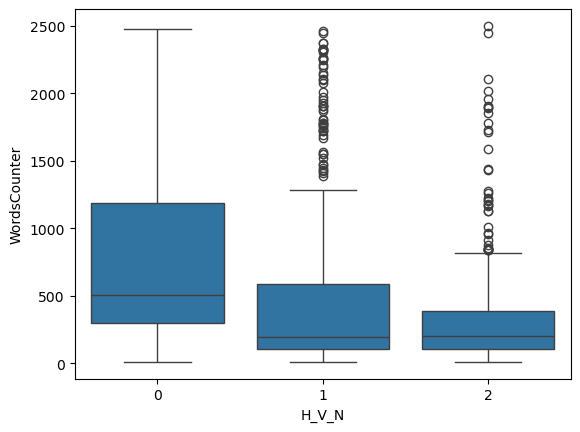

In [3]:
sns.boxplot(y='WordsCounter', x='H_V_N', data=df)
plt.show()

#### Now we will ask AI to generate list of words that are characteristics for Heroes, Villains and Neutral characters. There is also need for another groups of words that can be used by all characters and they are needed to formulate the sentences properly (including punctuation and other special marks). Words are unique for particular group. All Words are unique and they are not repeated.

In [4]:
hero_words = ['sacrifice', 'loyalty', 'self-control', 'brave', 'advocate', 'good-hearted', 'righteous', 'unyielding', 'friendship', 'peacemaker', 'admiration', 'inspire', 'clarity', 'inspiration', 'selflessness', 'save', 'reliability', 'mediator', 'dedication', 'reassurance', 'champion', 'valor', 'wisdom', 'solace', 'humble', 'optimism', 'defender', 'peace', 'purity', 'support', 'virtue', 'trust', 'reconciliation', 'positive', 'encourager', 'heroism', 'courage', 'healer', 'benevolence', 'camaraderie', 'self-respect', 'noble', 'resolve', 'pioneer', 'reliable', 'hopefulness', 'savior', 'goodness', 'builder', 'nobility', 'sincerity', 'bravery', 'reformer', 'model', 'pillar', 'steadfast', 'harmonizer', 'solidarity', 'compassion', 'helper', 'magnanimity', 'unifier', 'honor', 'devotion', 'mentor', 'kindness', 'hero', 'strength', 'rescue', 'teamwork', 'honorable', 'salvation', 'zeal', 'dignity', 'justice', 'leader', 'warmth', 'protector', 'faith', 'protection', 'care', 'commitment', 'guiding', 'unity', 'charity', 'guide', 'respect',  'pride', 'hope', 'shieldbearer', 'shield', 'rescuer', 'steadfastness', 'guardian', 'guard', 'belief', 'duty', 'integrity', 'resilient', 'truth', 'peacekeeper', 'trustworthy', 'empathy', 'visionary', 'determination', 'perseverance', 'forgiveness', 'understanding', 'altruism', 'shelter']
villain_words = ['beast', 'tyrant', 'terror', 'arsonist', 'immoral', 'black-hearted', 'annihilation', 'dread', 'tormentor', 'mastermind', 'tyranny', 'fiend', 'greed', 'deceit', 'exploiter', 'pillager', 'malevolence', 'assassin', 'double-crosser', 'oppression', 'extortion', 'ruthless', 'darklord', 'dictator', 'crime', 'robber', 'slaver', 'outlaw', 'ruiner', 'plotting', 'anger', 'shadow', 'deception', 'defiler', 'abuser', 'wickedness', 'vile', 'corrupter', 'darkness', 'bribery', 'wrath', 'manipulation', 'predator', 'demon', 'mockery', 'usurper', 'violence', 'arrogance', 'executioner', 'brute', 'rebellion', 'criminal', 'mercenary', 'merciless', 'destructor', 'havoc', 'theft', 'terrorizer', 'sadist', 'torment', 'heartless', 'destruction', 'aggressor', 'infiltrator', 'warmonger', 'fraud', 'vandal', 'blackmail', 'oppressor', 'malice', 'schemer', 'ambush', 'betrayal', 'destroyer', 'despot', 'intimidation', 'persecutor', 'cruelty', 'thievery', 'nightmare', 'revenge', 'villain', 'conspiracy', 'betrayer', 'poison', 'threat', 'shadowy', 'megalomaniac', 'despair', 'liar', 'vengeful', 'insidious', 'selfishness', 'malevolent', 'horror', 'traitor', 'corruption', 'hatred', 'exploitation', 'massacre', 'despoiler', 'deceiver', 'chaos', 'usurpation', 'ravager',  'backstabber', 'vengeance', 'fear', 'invader', 'cold-blooded']
neutral_words = ['quiet', 'independent', 'circumspect', 'mediatory', 'rationality', 'judge', 'watchful', 'reviewer', 'researcher', 'level-headed', 'evaluator', 'third-party', 'even-handed', 'moderation', 'calmness', 'fairness', 'adaptable', 'bystander', 'practical', 'stability', 'reflective', 'consultation', 'collaborator', 'negotiator', 'diplomacy', 'patience', 'stabilizer', 'neutralizer', 'impartial', 'flexible', 'arbiter', 'pacifier', 'tactful', 'deliberation', 'impartiality', 'observer', 'neutral', 'introspection', 'tactician', 'observant', 'pragmatism', 'reconciler', 'reasoned', 'inquisitor', 'contemplator', 'balance', 'inquiry', 'prudent', 'unprejudiced', 'diplomatic', 'carefulness', 'fair', 'resourceful', 'peaceful', 'analyzer', 'thinker', 'stable', 'investigator', 'inquisitive', 'serenity', 'curious', 'contemplative', 'tact', 'judicious', 'inspector', 'collaboration', 'consensus', 'calm', 'detached', 'steady', 'discretion', 'calculated', 'reserved', 'skeptic', 'balanced', 'assessor', 'harmonious', 'watchman', 'balancer', 'harmony', 'steadiness', 'careful', 'intermediary', 'pacifist', 'tranquil', 'equanimity', 'thoughtful', 'reasoning', 'equilibrium', 'arbitrator', 'listener', 'introspective', 'logic', 'unbiased', 'patient', 'considerate', 'deliberator', 'reasoner', 'appraiser', 'moderator', 'analysis', 'cautious', 'average', 'between', 'grey', 'indifferent', 'lethargic', 'apathetic', 'sluggish', 'opinionless']
sentence_words = ['under', 'yes', 'Abigail', 'never', 'sure', 'it', 'them', 'of', 'I', 'those', 'wow', 'and', 'about', 'so', 'dreadful', ':', 'his', 'therefore', 'obviously', 'as', 'wonderful', 'probably', 'no', 'or', '&', 'then', 'Penelope', 'they', 'unbelievable', 'horrible', 'definitely', 'who', 'Amelia', 'when', 'Mia', 'Richard', 'Andrew', 'above', 'ugly', 'fine', 'kind', 'Isabella', 'why', 'their', 'mean', 'okay', 'at', 'goodbye', 'eventually', 'because', '(', 'him', 'with', 'however', 'up', 'Matthew', 'Grace', ';', '...', 'that', 'unfriendly', 'our', 'where', 'Olivia', 'James', 'really', 'into', 'terrible', 'friendly', 'huh', 'my', 'Lily', 'Daniel', 'incredible', 'thanks', ')', 'the', 'through', 'certainly', 'good', 'in', 'rarely', 'cruel', 'Harper', 'by', 'always', 'this', 'to', 'a', 'hideous', 'ours', 'Aria', 'hey', 'theirs', 'hers', 'still', 'us', 'yet', 'me', 'twice', '.', ',', 'these', 'what', 'from', 'oh', 'Ava', '-', 'mine', 'yours', 'on', 'before', 'between', 'out', 'though', 'surely', 'nice', 'sorry', 'for', 'excellent', 'an', 'indeed', 'first', 'actually', 'hi', 'welcome', 'thrice', '!', 'hmm', 'Michael', 'if', 'later', 'your', 'how', 'down', 'since', 'tomorrow', 'alright', '?', 'but', 'her', 'awesome', 'today', 'Sarah', 'bad', 'Eleanor', 'awful', 'please', 'furthermore', 'finally', 'she', 'yesterday', '{', 'below', 'Nicholas', 'ah', 'you', 'fantastic', '}', 'hello', 'soon', 'after', 'lovely', 'again', 'we', 'once', 'often', 'sometimes', 'moreover', 'beautiful', 'possibly', 'he', 'amazing', 'maybe', 'great', 'its', 'over', 'sun', 'full', 'afternoon', 'morning', 'moon', 'falcon', 'dinner', 'earth', 'water', 'fire', 'wind', '~', '^' ]


In [5]:
sentence_and_punctuation = set(sentence_words) & set(string.punctuation)
sentence_and_stopwords = set(sentence_words) & set(nltk.corpus.stopwords.words("english"))
print('All stop words and punctuation that apear in sentence_words list = ',len(sentence_and_punctuation)+len(sentence_and_stopwords))


All stop words and punctuation that apear in sentence_words list =  80


In [6]:
print('All words from hero_words list = ', len(hero_words))
print('All words from villain_words list = ',len(villain_words))
print('All words from neutral_words list = ',len(neutral_words), '\n')
print('All words/signs from sentence_words list = ',len(sentence_words))
print('All words from sentence_words list without punctuation and stop words = ',len(sentence_words)-len(sentence_and_punctuation)-len(sentence_and_stopwords))

All words from hero_words list =  110
All words from villain_words list =  110
All words from neutral_words list =  110 

All words/signs from sentence_words list =  190
All words from sentence_words list without punctuation and stop words =  110


#### Words lists looks nice and its time to start generate the words for all characters. They need to be distibuted in a different way but also not the same for all Heroes or Villains and it need to be randomized to make it harder for Calsiffier. After few runs of generator the limits were set for: 
#### Heroes use 30% ±10% of hero words, use 10% ±5% of Villains words, 10% ±5% of Neutral words and rest are sentence creating words
#### Villains use 10% ±5% of hero words, use 30% ±10% of Villains words, 10% ±5% of Neutral words and rest are sentence creating words
#### Neutral Characters use 15% +20%/-10% of hero words, use 15% +20%/-10% of Villains words, 20% ±15% of Neutral words and rest are sentence creating words
#### It is allowed for heroes to use Villains words and vice versa. Villains can create sentence like "you are not brave" where word "brave" is in hero list. All words can be used by all characters but we would like to limit frequency of usage of particular list. Beside of that it would be to easy task for classification. 
#### After words generation for particular character they are shuffled and placed in column "Words"

In [7]:
def generate_words(character_type, word_count):
    if character_type == 0:  # Hero
        hero_ratio = 0.30 + np.random.uniform(-0.1, 0.1)
        villain_ratio = 0.08 + np.random.uniform(-0.05, 0.05)
        neutral_ratio = 0.1 + np.random.uniform(-0.05, 0.05)
        sentence_ratio = 1 - (hero_ratio + villain_ratio + neutral_ratio)             
        
        hero_words_count = int(hero_ratio * word_count)
        villain_words_count = int(villain_ratio * word_count)
        neutral_words_count = int(neutral_ratio * word_count)
        sentence_words_count = word_count - (hero_words_count + villain_words_count + neutral_words_count)

        words = (
            random.choices(hero_words, k=hero_words_count) +
            random.choices(villain_words, k=villain_words_count) +
            random.choices(neutral_words, k=neutral_words_count) +
            random.choices(sentence_words, k=sentence_words_count)
        )
        
    elif character_type == 1:  # Villain
        hero_ratio = 0.1 + np.random.uniform(-0.05, 0.05)
        villain_ratio = 0.30 + np.random.uniform(-0.1, 0.1)
        neutral_ratio = 0.1 + np.random.uniform(-0.05, 0.05)
        sentence_ratio = 1 - (hero_ratio + villain_ratio + neutral_ratio)             
        
        hero_words_count = int(hero_ratio * word_count)
        villain_words_count = int(villain_ratio * word_count)
        neutral_words_count = int(neutral_ratio * word_count)
        sentence_words_count = word_count - (hero_words_count + villain_words_count + neutral_words_count)

        words = (
            random.choices(hero_words, k=hero_words_count) +
            random.choices(villain_words, k=villain_words_count) +
            random.choices(neutral_words, k=neutral_words_count) +
            random.choices(sentence_words, k=sentence_words_count)
        )
        
    elif character_type == 2:  # Neutral
        hero_ratio = 0.15 + np.random.uniform(-0.1, 0.2)
        villain_ratio = 0.15 + np.random.uniform(-0.1, 0.2)
        neutral_ratio = 0.2 + np.random.uniform(-0.15, 0.15)
        sentence_ratio = 1 - (hero_ratio + villain_ratio + neutral_ratio)             
        
        hero_words_count = int(hero_ratio * word_count)
        villain_words_count = int(villain_ratio * word_count)
        neutral_words_count = int(neutral_ratio * word_count)
        sentence_words_count = word_count - (hero_words_count + villain_words_count + neutral_words_count)

        words = (
            random.choices(hero_words, k=hero_words_count) +
            random.choices(villain_words, k=villain_words_count) +
            random.choices(neutral_words, k=neutral_words_count) +
            random.choices(sentence_words, k=sentence_words_count)
        )
        
    else:
        words = []
        
    random.shuffle(words)
    return words

df["Words"] = df.apply(lambda row: generate_words(row["H_V_N"], row["WordsCounter"]), axis=1)
df

,H_V_N,Character,MovieNo,WordsCounter,Words
0,2,Beth_Reynolds_LightBlade,2,141,"[balanced, valor, unity, mine, clarity, justic..."
1,2,Ashley_Shaw_IcePhoenix,3,97,"[again, where, altruism, ambush, inspire, betr..."
2,2,Sarah_Clark_NightReaper,2,93,"[dinner, ah, optimism, water, clarity, rarely,..."
3,2,James_Flynn_GhostBlade,2,227,"[model, hero, (, terrible, fear, it, hopefulne..."
4,2,Caitlin_Acosta_GhostBlade,2,134,"[support, friendship, she, rebellion, reconcil..."
...,...,...,...,...,...
1033,0,Samantha_Preston_ValkyrieBolt,1,430,"[..., guard, an, wind, excellent, support, (, ..."
1034,0,Marcia_Lawson_ScarletShark,3,14,"[then, hello, his, before, altruism, her, stre..."
1035,0,Emily_Espinoza_BoltInferno,1,371,"[but, justice, positive, them, ah, careful, tw..."
1036,0,Alan_Owens_NightReaper,2,422,"[him, pride, since, dreadful, ugly, morning, r..."


#### Characters were generated together with words that are "spoken" by them. Part 1 is Over. 

## Part 2 Machine learning project 

#### Now the text will be cleaned from puncation. It is clear that words were generated and now we do something opposite, they are removed, but it simulate work with real movie dialogues that also need to be cleaned. 

In [8]:
df['Words'] = df['Words'].apply(lambda x: ' '.join(x))
def remove_puncation(text):
    cleaned = ''.join([word for word in text if word not in string.punctuation])
    return cleaned
df['Cleaned_Text'] = df['Words'].apply(lambda x: remove_puncation(x))
df.drop('Words', axis=1, inplace=True)
df

,H_V_N,Character,MovieNo,WordsCounter,Cleaned_Text
0,2,Beth_Reynolds_LightBlade,2,141,balanced valor unity mine clarity justice judg...
1,2,Ashley_Shaw_IcePhoenix,3,97,again where altruism ambush inspire betrayal h...
2,2,Sarah_Clark_NightReaper,2,93,dinner ah optimism water clarity rarely yours ...
3,2,James_Flynn_GhostBlade,2,227,model hero terrible fear it hopefulness we su...
4,2,Caitlin_Acosta_GhostBlade,2,134,support friendship she rebellion reconciliatio...
...,...,...,...,...,...
1033,0,Samantha_Preston_ValkyrieBolt,1,430,guard an wind excellent support bravery at R...
1034,0,Marcia_Lawson_ScarletShark,3,14,then hello his before altruism her strength ni...
1035,0,Emily_Espinoza_BoltInferno,1,371,but justice positive them ah careful twice hop...
1036,0,Alan_Owens_NightReaper,2,422,him pride since dreadful ugly morning reasoner...


#### Next part is capital letter change to have only lowercase letter and tokenization

In [9]:
def tokenize(text):
    # Capital letter removal
    clean_text = text.lower()
    
    # tokenization
    tokenized_text = nltk.word_tokenize(clean_text)
    return tokenized_text

df['Tokenized_Text'] = df['Cleaned_Text'].apply(lambda x: tokenize(x))
df.drop('Cleaned_Text', axis=1, inplace=True)
df

,H_V_N,Character,MovieNo,WordsCounter,Tokenized_Text
0,2,Beth_Reynolds_LightBlade,2,141,"[balanced, valor, unity, mine, clarity, justic..."
1,2,Ashley_Shaw_IcePhoenix,3,97,"[again, where, altruism, ambush, inspire, betr..."
2,2,Sarah_Clark_NightReaper,2,93,"[dinner, ah, optimism, water, clarity, rarely,..."
3,2,James_Flynn_GhostBlade,2,227,"[model, hero, terrible, fear, it, hopefulness,..."
4,2,Caitlin_Acosta_GhostBlade,2,134,"[support, friendship, she, rebellion, reconcil..."
...,...,...,...,...,...
1033,0,Samantha_Preston_ValkyrieBolt,1,430,"[guard, an, wind, excellent, support, bravery,..."
1034,0,Marcia_Lawson_ScarletShark,3,14,"[then, hello, his, before, altruism, her, stre..."
1035,0,Emily_Espinoza_BoltInferno,1,371,"[but, justice, positive, them, ah, careful, tw..."
1036,0,Alan_Owens_NightReaper,2,422,"[him, pride, since, dreadful, ugly, morning, r..."


#### Next step will be to remove all stopwords that gives us no added value in analyse. 

In [10]:
stopwords = nltk.corpus.stopwords.words("english")

In [11]:
def remove_stopwords(text):
    without_stopwords = [word for word in text if word not in stopwords]
    return without_stopwords
df['WithoutStop_Text'] = df['Tokenized_Text'].apply(lambda x: remove_stopwords(x))
df.drop('Tokenized_Text', axis=1, inplace=True)
df

,H_V_N,Character,MovieNo,WordsCounter,WithoutStop_Text
0,2,Beth_Reynolds_LightBlade,2,141,"[balanced, valor, unity, mine, clarity, justic..."
1,2,Ashley_Shaw_IcePhoenix,3,97,"[altruism, ambush, inspire, betrayal, hopefuln..."
2,2,Sarah_Clark_NightReaper,2,93,"[dinner, ah, optimism, water, clarity, rarely,..."
3,2,James_Flynn_GhostBlade,2,227,"[model, hero, terrible, fear, hopefulness, sup..."
4,2,Caitlin_Acosta_GhostBlade,2,134,"[support, friendship, rebellion, reconciliatio..."
...,...,...,...,...,...
1033,0,Samantha_Preston_ValkyrieBolt,1,430,"[guard, wind, excellent, support, bravery, ric..."
1034,0,Marcia_Lawson_ScarletShark,3,14,"[hello, altruism, strength, nice, harmony, mat..."
1035,0,Emily_Espinoza_BoltInferno,1,371,"[justice, positive, ah, careful, twice, hope, ..."
1036,0,Alan_Owens_NightReaper,2,422,"[pride, since, dreadful, ugly, morning, reason..."


#### Last step will be words lemmatization

In [12]:
lemmater = nltk.WordNetLemmatizer()
def lemmatizing(text):
    lemmatized_words = [lemmater.lemmatize(word) for word in text]
    return lemmatized_words
df['Lemmatized_Text'] = df['WithoutStop_Text'].apply(lambda x: lemmatizing(x))
df.drop('WithoutStop_Text', axis=1, inplace=True)
df

,H_V_N,Character,MovieNo,WordsCounter,Lemmatized_Text
0,2,Beth_Reynolds_LightBlade,2,141,"[balanced, valor, unity, mine, clarity, justic..."
1,2,Ashley_Shaw_IcePhoenix,3,97,"[altruism, ambush, inspire, betrayal, hopefuln..."
2,2,Sarah_Clark_NightReaper,2,93,"[dinner, ah, optimism, water, clarity, rarely,..."
3,2,James_Flynn_GhostBlade,2,227,"[model, hero, terrible, fear, hopefulness, sup..."
4,2,Caitlin_Acosta_GhostBlade,2,134,"[support, friendship, rebellion, reconciliatio..."
...,...,...,...,...,...
1033,0,Samantha_Preston_ValkyrieBolt,1,430,"[guard, wind, excellent, support, bravery, ric..."
1034,0,Marcia_Lawson_ScarletShark,3,14,"[hello, altruism, strength, nice, harmony, mat..."
1035,0,Emily_Espinoza_BoltInferno,1,371,"[justice, positive, ah, careful, twice, hope, ..."
1036,0,Alan_Owens_NightReaper,2,422,"[pride, since, dreadful, ugly, morning, reason..."


#### Now we can create word cloud for all 3 Characters groups

In [13]:
words_hero = list(df.loc[df['H_V_N']==0, 'Lemmatized_Text'].values)
words_hero = list(itertools.chain.from_iterable(words_hero))
words_hero = ' '.join(words_hero)
words_villan = list(df.loc[df['H_V_N']==1, 'Lemmatized_Text'].values)
words_villan = list(itertools.chain.from_iterable(words_villan))
words_villan = ' '.join(words_villan)
words_neu = list(df.loc[df['H_V_N']==2, 'Lemmatized_Text'].values)
words_neu = list(itertools.chain.from_iterable(words_neu))
words_neu = ' '.join(words_neu)

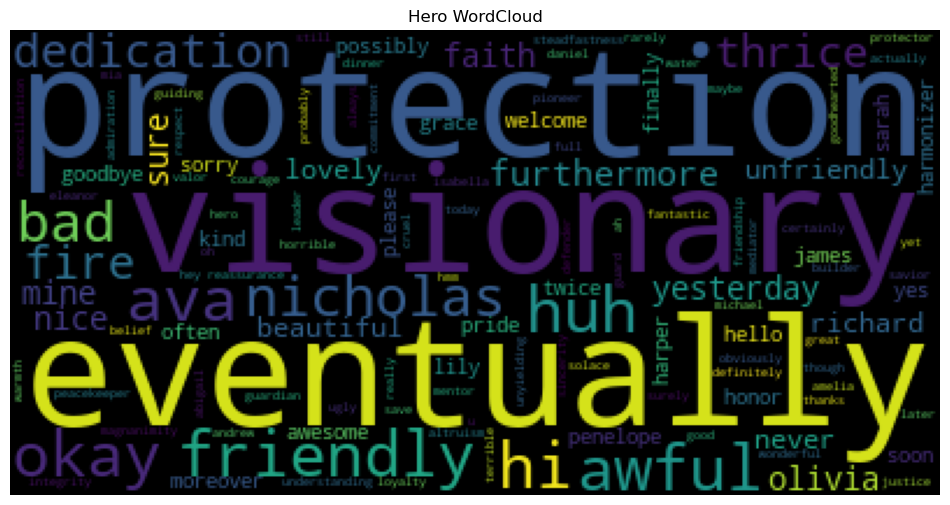

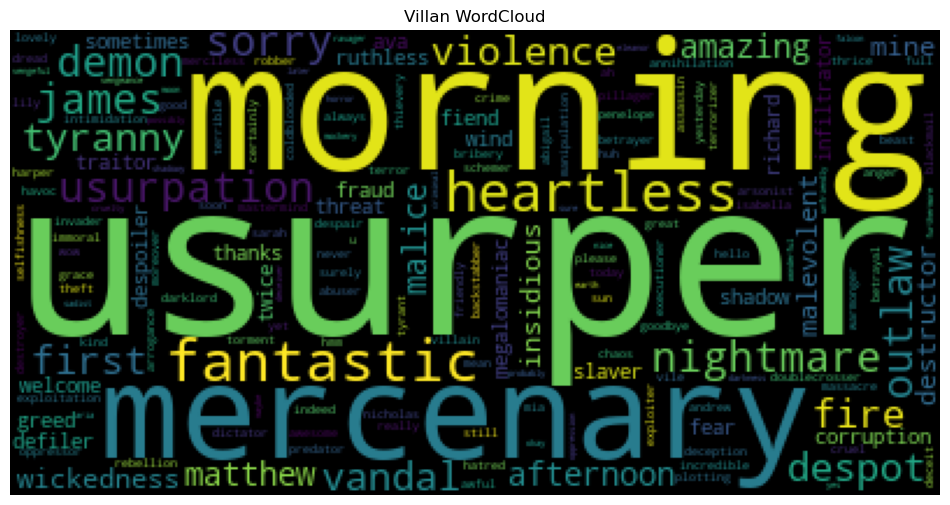

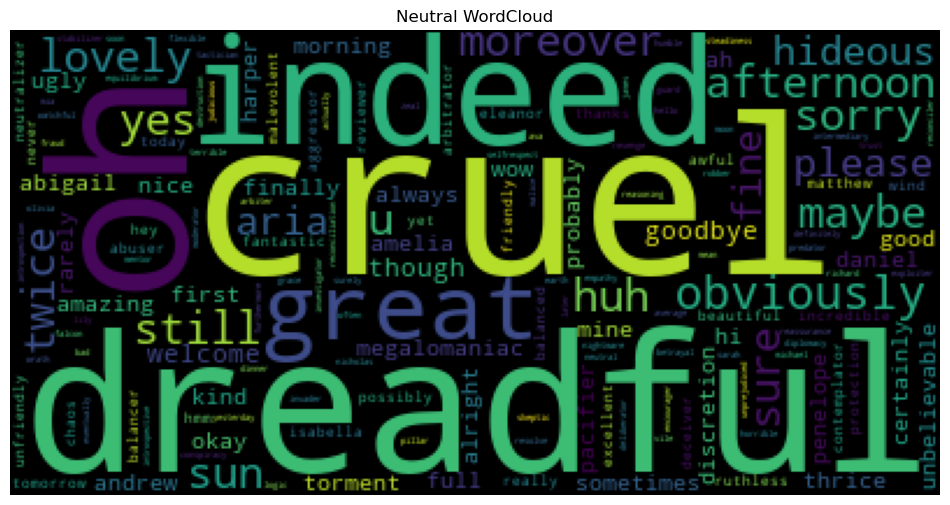

In [14]:
wordcloud = WordCloud(collocations=False).generate(words_hero)
plt.figure(figsize = (12, 8))
plt.imshow(wordcloud)
plt.axis("off")
plt.title('Hero WordCloud')
plt.show()
wordcloud1 = WordCloud(collocations=False).generate(words_villan)
plt.figure(figsize = (12,8))
plt.imshow(wordcloud1)
plt.axis("off")
plt.title('Villan WordCloud')
plt.show()
wordcloud2 = WordCloud(collocations=False).generate(words_neu)
plt.figure(figsize = (12,8))
plt.imshow(wordcloud2)
plt.axis("off")
plt.title('Neutral WordCloud')
plt.show()

#### Now we will update WordCounter column due to operations performed on text column (removal of some words/punctuation). Additionally we can analyse current text regarding content of particular lists. Additional 4 columns will be created. For example in column "Hero %" we will see how many words are assigned to particular character based on hero words list (in %). This column will not be used for classification to not simplify classifier task. Classifier need to figure it out by itself. In real movie dialogues there are no list of words speaken by Heroes and classifier have no access to such data. It is possible to create such list based on vocabulary and include it in real movie analyses but in our case we will not use such option. 

In [15]:
def words_calculation(df_calculation):
    for i in range(df_calculation.shape[0]):
        df_calculation.loc[i, 'WordsCounter'] = len(df_calculation.iloc[i,4])
        heroes_words_counter = 0   
        villains_words_counter = 0 
        neutral_words_counter = 0
        for word in df_calculation.iloc[i,4]:
            if word in hero_words:
                heroes_words_counter += 1
            elif word in villain_words:
                villains_words_counter += 1
            elif word in neutral_words:
                neutral_words_counter += 1
            else:
                pass
        df_calculation.loc[i, 'Hero %'] = round((heroes_words_counter/df_calculation.iloc[i,3])*100, 1)
        df_calculation.loc[i, 'Villain %'] = round((villains_words_counter/df_calculation.iloc[i,3])*100, 1)
        df_calculation.loc[i, 'Neutral %'] = round((neutral_words_counter/df_calculation.iloc[i,3])*100, 1)
        df_calculation.loc[i, 'Senten. %'] = round(((df_calculation.iloc[i,3]-neutral_words_counter-villains_words_counter-heroes_words_counter)/df_calculation.iloc[i,3])*100, 1)
    return df_calculation

df = words_calculation(df)
df 

,H_V_N,Character,MovieNo,WordsCounter,Lemmatized_Text,Hero %,Villain %,Neutral %,Senten. %
0,2,Beth_Reynolds_LightBlade,2,123,"[balanced, valor, unity, mine, clarity, justic...",22.0,17.1,35.8,25.2
1,2,Ashley_Shaw_IcePhoenix,3,83,"[altruism, ambush, inspire, betrayal, hopefuln...",38.6,34.9,7.2,19.3
2,2,Sarah_Clark_NightReaper,2,68,"[dinner, ah, optimism, water, clarity, rarely,...",39.7,10.3,10.3,39.7
3,2,James_Flynn_GhostBlade,2,198,"[model, hero, terrible, fear, hopefulness, sup...",35.4,7.1,30.8,26.8
4,2,Caitlin_Acosta_GhostBlade,2,108,"[support, friendship, rebellion, reconciliatio...",25.0,23.1,6.5,45.4
...,...,...,...,...,...,...,...,...,...
1033,0,Samantha_Preston_ValkyrieBolt,1,324,"[guard, wind, excellent, support, bravery, ric...",36.1,12.3,10.5,41.0
1034,0,Marcia_Lawson_ScarletShark,3,7,"[hello, altruism, strength, nice, harmony, mat...",42.9,0.0,14.3,42.9
1035,0,Emily_Espinoza_BoltInferno,1,274,"[justice, positive, ah, careful, twice, hope, ...",27.4,5.8,16.4,50.4
1036,0,Alan_Owens_NightReaper,2,342,"[pride, since, dreadful, ugly, morning, reason...",43.6,13.2,13.2,30.1


#### Now data will be analysed - EDA 

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1038 entries, 0 to 1037
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   H_V_N            1038 non-null   int64  
 1   Character        1038 non-null   object 
 2   MovieNo          1038 non-null   int64  
 3   WordsCounter     1038 non-null   int64  
 4   Lemmatized_Text  1038 non-null   object 
 5   Hero %           1038 non-null   float64
 6   Villain %        1038 non-null   float64
 7   Neutral %        1038 non-null   float64
 8   Senten. %        1038 non-null   float64
dtypes: float64(4), int64(3), object(2)
memory usage: 73.1+ KB


#### Below there are datails about generated data. With each program run data will change due to random character of generated data. Now it can be check what is characters number and max - min values of WordCount. We can also check what are are global percentages of particular word groups usage.

In [17]:
df.describe()

,H_V_N,MovieNo,WordsCounter,Hero %,Villain %,Neutral %,Senten. %
count,1038.000000,1038.000000,1038.000000,1038.000000,1038.000000,1038.000000,1038.000000
mean,1.383430,2.018304,358.964355,21.202601,25.457033,18.033141,35.308478
std,0.717191,0.825493,439.577506,11.093212,11.846563,9.134855,11.466090
min,0.000000,1.000000,7.000000,5.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,87.000000,11.800000,14.625000,11.000000,27.825000
50%,2.000000,2.000000,181.500000,17.900000,27.300000,15.400000,36.200000
75%,2.000000,3.000000,413.750000,30.775000,34.500000,24.600000,43.600000
max,2.000000,3.000000,2154.000000,55.600000,50.000000,42.300000,72.600000


#### Checking number of characters in movie number 1,2,3. All bars should have similar height due to random character of data 

MovieNo
3    363
1    344
2    331
Name: count, dtype: int64


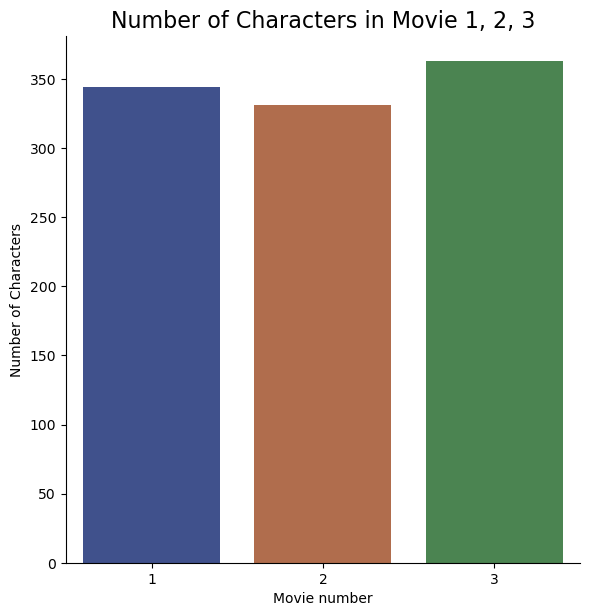

In [18]:
g = sns.catplot( data=df, x='MovieNo', kind='count', alpha=.8, height=6, palette = 'dark', legend=False, hue='MovieNo')
g.set_axis_labels("Movie number", "Number of Characters")
plt.title('Number of Characters in Movie 1, 2, 3', fontsize = 16)
print(df['MovieNo'].value_counts())
plt.show()

#### Checking how many Heroes\Villains\Neutral characters appear in all movies. Differencess will be large due to rules implemented in characters generator. The most numerous group will be always neutral character and the smallest groups will be always heroes. 

H_V_N
2    542
1    352
0    144
Name: count, dtype: int64


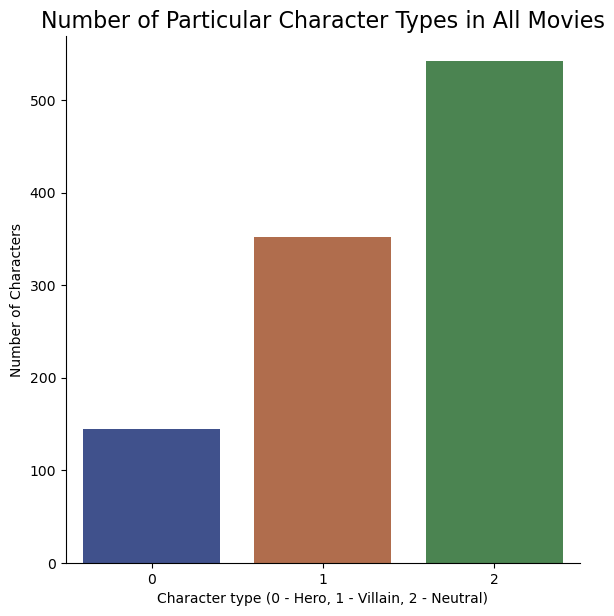

In [19]:
g = sns.catplot( data=df, x='H_V_N', kind='count', alpha=.8, height=6, palette = 'dark', legend=False, hue='H_V_N')
g.set_axis_labels("Character type (0 - Hero, 1 - Villain, 2 - Neutral)", "Number of Characters")
plt.title('Number of Particular Character Types in All Movies', fontsize = 16)
print(df['H_V_N'].value_counts())
plt.show()

#### Detail information about particular characters in each movie. 

Number of particilar characters in movie number 1:
 H_V_N
2    197
1    106
0     41
Name: count, dtype: int64
Number of particilar characters in movie number 2:
 H_V_N
2    175
1    114
0     42
Name: count, dtype: int64
Number of particilar characters in movie number 3:
 H_V_N
2    170
1    132
0     61
Name: count, dtype: int64


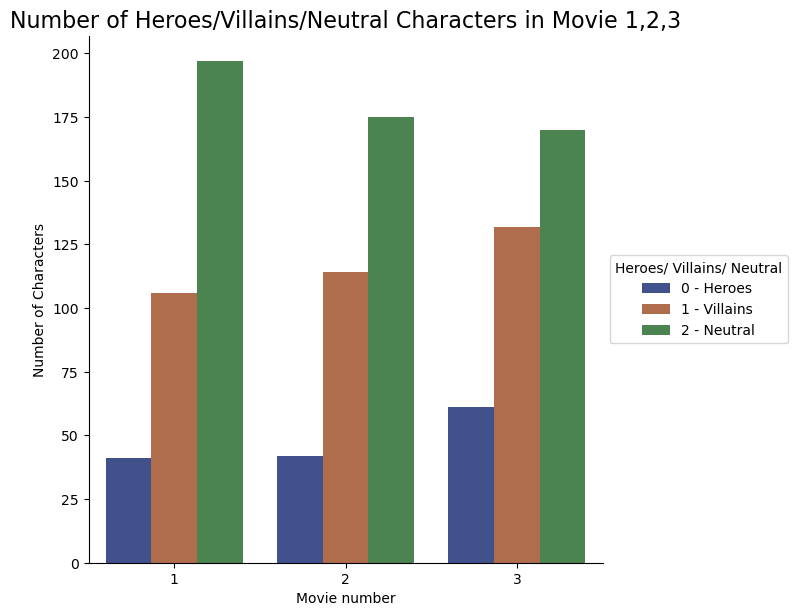

In [20]:
g = sns.catplot( data=df, x='MovieNo', kind='count',  hue="H_V_N", palette="dark", alpha=.8, height=6, legend = False)
g.set_axis_labels("Movie number", "Number of Characters")
plt.title('Number of Heroes/Villains/Neutral Characters in Movie 1,2,3', fontsize = 16)
plt.legend(title='Heroes/ Villains/ Neutral', loc='center left', bbox_to_anchor=(1, 0.5), labels=['0 - Heroes', '1 - Villains', '2 - Neutral'])
print("Number of particilar characters in movie number 1:\n", df['H_V_N'][df['MovieNo']==1].value_counts())
print("Number of particilar characters in movie number 2:\n",df['H_V_N'][df['MovieNo']==2].value_counts())
print("Number of particilar characters in movie number 3:\n",df['H_V_N'][df['MovieNo']==3].value_counts())
plt.show()

#### Below histogram shows number of words assigned to ALL characters. Great number of characters have less then 500 words

<Axes: ylabel='Frequency'>

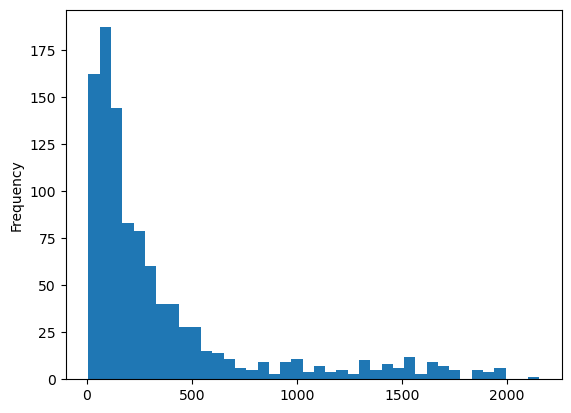

In [21]:
CountEDU = df['WordsCounter']
CountEDU.plot.hist(bins=40)

#### Data can be analysed for each grup individually - Heroes, Villains and Neutral Characters. It will be slight different boxplot comparing to boxplot from generator due to removal of some words and marks. 

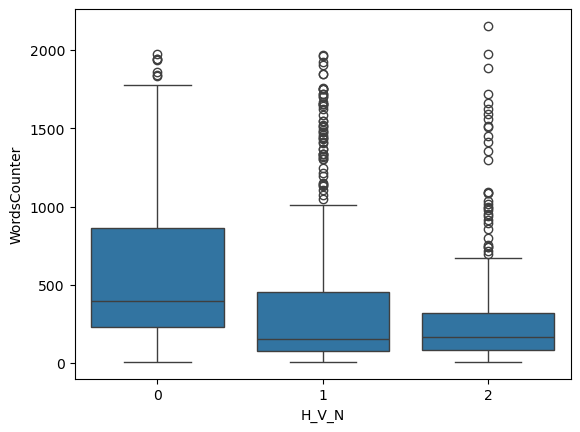

In [22]:
sns.boxplot(y='WordsCounter', x='H_V_N', data=df)
plt.show()

#### In last step it is possible to show density of values for particular characters types and compare them. Groups size differencess are not visible here. 

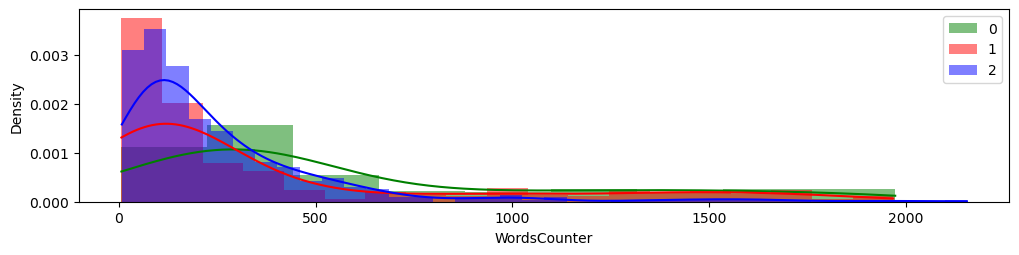

In [23]:
plt.figure(figsize=(12, 2.5))
sns.histplot(df.loc[df['H_V_N']==0, 'WordsCounter'], kde=True, stat="density", linewidth=0,color='green', label='0')
sns.histplot(df.loc[df['H_V_N']==1, 'WordsCounter'], kde=True, stat="density", linewidth=0, color='red', label='1')
sns.histplot(df.loc[df['H_V_N']==2, 'WordsCounter'], kde=True, stat="density", linewidth=0, color='blue', label='2')
plt.legend(loc='upper right')
plt.show()

#### Now it can be considered if lower/upper treshold of words count can help in classification of Characters. If the number of words differences will be to large (neutral Characters with 30 words vs Villains with 1500 words) it can affect clasification process and final results. Classifier can have not enough words to classify character properly if number of words is too low.  In this part it will be check what is influence of upper and lower threshold for classification process. It will be also check if limitation of max_features in TFIDF can also help in obtaining better classification results. It should be able to minimize the information noise and should help to chose more important words for classification. 
#### There are few methods to balance number of words. In our example we will try to remove characters with smaller number of words and check how it will affect results. We will also use upper threshold and check if removal of random words (from the most numerous collections) will also improve results of classification. 
#### It is true that removal of random words from high number words characters can cause loss of imortant information but from other side characters with large number of words should have enough information for proper classification and should be not so problematic, they provide lot of information during learing process but can also bring too much noise that can be easilly eliminated. Random words elimination should keep content of words from different list on similar level. 
#### Removal of characters with smaller ammount of words. From one hand it will decrease number of characters that bring low ammount of information to learing process. It is also not so easy to assign character for particular group with only  15 - 20 words. Such characters in larger number can cause that whole learning process is less robust. Another question is if we really want to assess characters that appear in movie with few words. Removal of such characters can be beneficial for learning of model. From the other side we will remove the "most problematic" characters from learning process so automaticly our model will make less mistakes with classification when such characters are not considered in assesment. It can improve ML results in a artifical way. For sure it is worth to check how particular thresholds will affect ML results. 

#### As first step the dataframe will be copied. There was a problem with data modification even with usage deepcopy method, so additional operation was performed on new dataframe to avoid changing of oryginal data in later operations

In [24]:
df_tresh = copy.deepcopy(df)
df_tresh['Lemmatized_Text'] = df_tresh['Lemmatized_Text'].apply(lambda x: ' '.join(x))
df_tresh['Lemmatized_Text'] = df_tresh['Lemmatized_Text'].apply(lambda x: x.split())
df_tresh

,H_V_N,Character,MovieNo,WordsCounter,Lemmatized_Text,Hero %,Villain %,Neutral %,Senten. %
0,2,Beth_Reynolds_LightBlade,2,123,"[balanced, valor, unity, mine, clarity, justic...",22.0,17.1,35.8,25.2
1,2,Ashley_Shaw_IcePhoenix,3,83,"[altruism, ambush, inspire, betrayal, hopefuln...",38.6,34.9,7.2,19.3
2,2,Sarah_Clark_NightReaper,2,68,"[dinner, ah, optimism, water, clarity, rarely,...",39.7,10.3,10.3,39.7
3,2,James_Flynn_GhostBlade,2,198,"[model, hero, terrible, fear, hopefulness, sup...",35.4,7.1,30.8,26.8
4,2,Caitlin_Acosta_GhostBlade,2,108,"[support, friendship, rebellion, reconciliatio...",25.0,23.1,6.5,45.4
...,...,...,...,...,...,...,...,...,...
1033,0,Samantha_Preston_ValkyrieBolt,1,324,"[guard, wind, excellent, support, bravery, ric...",36.1,12.3,10.5,41.0
1034,0,Marcia_Lawson_ScarletShark,3,7,"[hello, altruism, strength, nice, harmony, mat...",42.9,0.0,14.3,42.9
1035,0,Emily_Espinoza_BoltInferno,1,274,"[justice, positive, ah, careful, twice, hope, ...",27.4,5.8,16.4,50.4
1036,0,Alan_Owens_NightReaper,2,342,"[pride, since, dreadful, ugly, morning, reason...",43.6,13.2,13.2,30.1


#### Max number of words is 2500 (minus removed words) but to simplify analyse range 0-2000 will be used. It will be visible how many characters will be taken to analyse from each group in particular tresholds. 

In [25]:
list_char_tresh = np.arange(0, 2000, 100).tolist()
hero_list_tresh = []
villain_list_tresh = []
neutral_list_tresh = []

for i in list_char_tresh:
    hero_list_tresh.append(df['WordsCounter'][(df['WordsCounter']>=i)&(df['H_V_N']==0)].value_counts().sum())
    villain_list_tresh.append(df['WordsCounter'][(df['WordsCounter']>=i)&(df['H_V_N']==1)].value_counts().sum())
    neutral_list_tresh.append(df['WordsCounter'][(df['WordsCounter']>=i)&(df['H_V_N']==2)].value_counts().sum())

summary_table_tresh = {
                 'Words Number': list_char_tresh,
                 'Heroes left': hero_list_tresh,
                 'Vilains left': villain_list_tresh,
                 'Neutral left': neutral_list_tresh
                      }
summary_df_tresh = pd.DataFrame(summary_table_tresh)
summary_df_tresh.style.hide(axis="index")

Words Number,Heroes left,Vilains left,Neutral left
0,144,352,542
100,127,229,374
200,111,149,229
300,91,117,152
400,71,96,100
500,55,85,69
600,46,81,45
700,42,73,32
800,41,70,27
900,36,65,25


#### Bar plot can be created for better visualization of the data. 

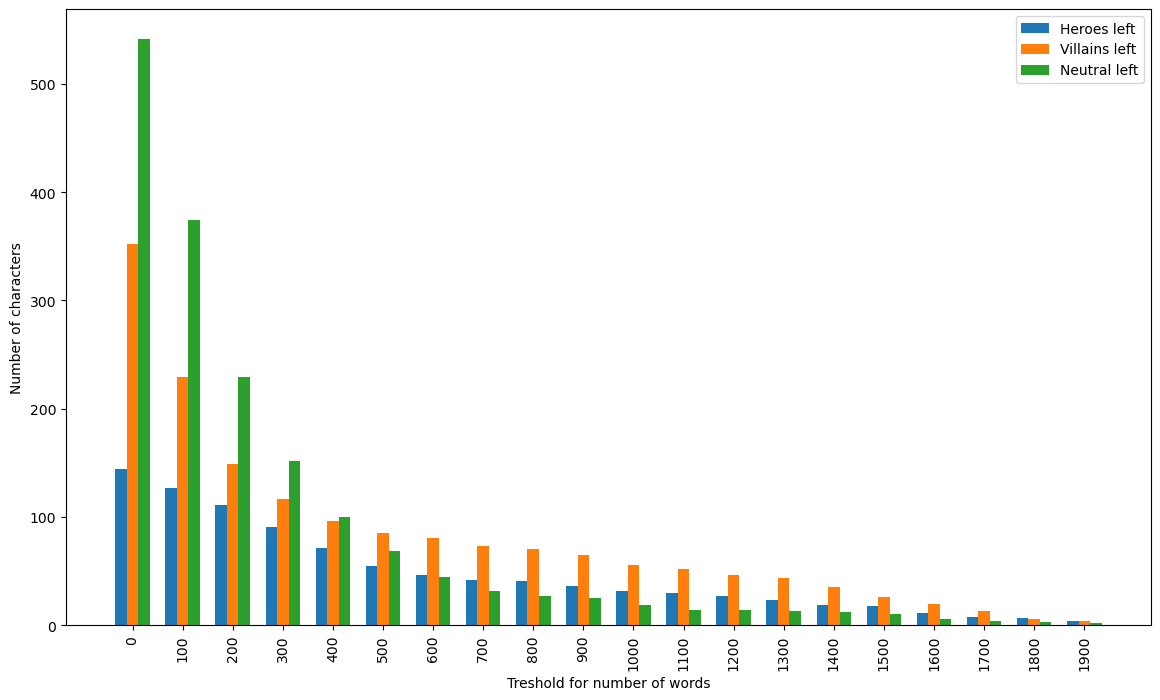

In [26]:
x = summary_df_tresh['Words Number']
y1 = summary_df_tresh['Heroes left']
y2 = summary_df_tresh['Vilains left']
y3 = summary_df_tresh['Neutral left']
width = 23
  
plt.figure(figsize=(14, 8))
plt.bar(x-23, y1, width) 
plt.bar(x, y2, width) 
plt.bar(x+23, y3, width) 
plt.xticks(summary_df_tresh['Words Number'], rotation='vertical' )
plt.legend(['Heroes left', 'Villains left', 'Neutral left'])
plt.xlabel('Treshold for number of words')
plt.ylabel('Number of characters')
plt.show()

#### Above barchart shows how many characters will be taken to analysis after reaching particular thresholds. Best character groups balance seems to be between 200 - 400 words. In range 0-100 there are lot of Neutral and Villains that have low ammount of words that can be considered to be removed. For more details the new bar chart will be prepared. For upper threshold we can try to use some hard and soft thresholds and values between to understand how it will help in classification process. Soft would be 1600, hard would be 400. It is resonable to check list: [400, 600, 800, 1000, 1300, 1600]

In [27]:
list_char_tresh = np.arange(0, 420, 20).tolist()
hero_list_tresh = []
villain_list_tresh = []
neutral_list_tresh = []

for i in list_char_tresh:
    hero_list_tresh.append(df['WordsCounter'][(df['WordsCounter']>=i)&(df['H_V_N']==0)].value_counts().sum())
    villain_list_tresh.append(df['WordsCounter'][(df['WordsCounter']>=i)&(df['H_V_N']==1)].value_counts().sum())
    neutral_list_tresh.append(df['WordsCounter'][(df['WordsCounter']>=i)&(df['H_V_N']==2)].value_counts().sum())

summary_table_tresh = {
                 'Words Number': list_char_tresh,
                 'Heroes left': hero_list_tresh,
                 'Vilains left': villain_list_tresh,
                 'Neutral left': neutral_list_tresh
                      }
summary_df_tresh = pd.DataFrame(summary_table_tresh)
summary_df_tresh.style.hide(axis="index")

Words Number,Heroes left,Vilains left,Neutral left
0,144,352,542
20,140,342,532
40,138,321,496
60,136,291,453
80,132,262,415
100,127,229,374
120,126,206,342
140,124,189,301
160,116,168,279
180,114,158,252


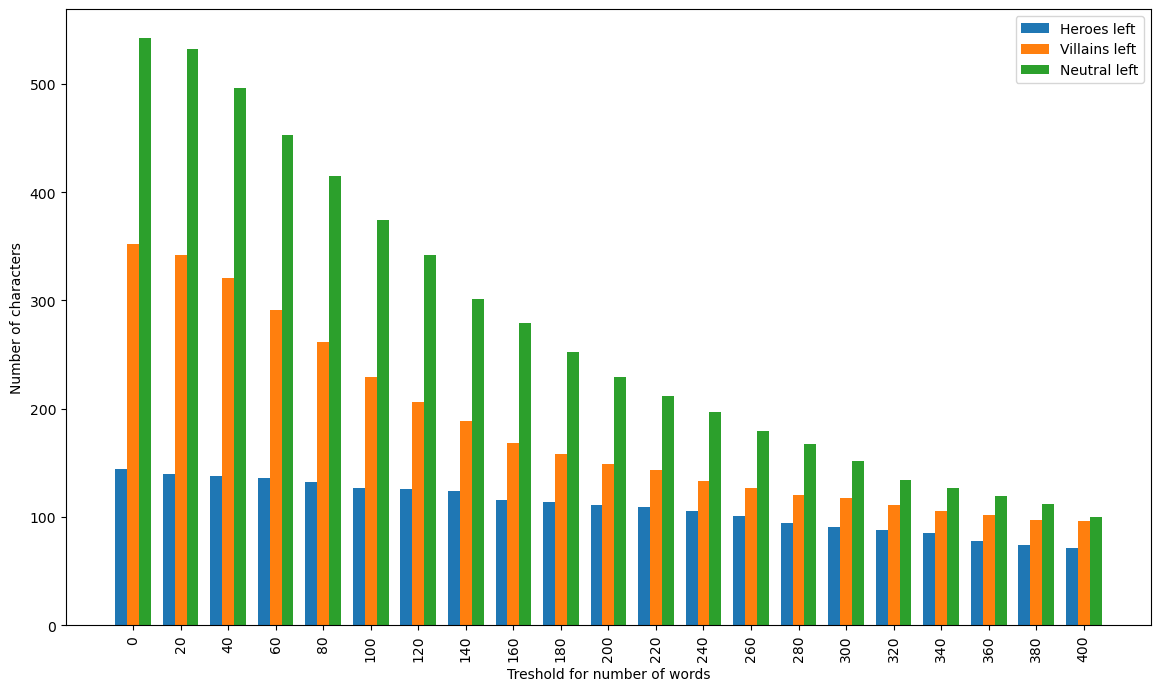

In [28]:
x = summary_df_tresh['Words Number']
y1 = summary_df_tresh['Heroes left']
y2 = summary_df_tresh['Vilains left']
y3 = summary_df_tresh['Neutral left']
width = 5
  
plt.figure(figsize=(14, 8))
plt.bar(x-5, y1, width) 
plt.bar(x, y2, width) 
plt.bar(x+5, y3, width) 
plt.xticks(summary_df_tresh['Words Number'], rotation='vertical' )
plt.legend(['Heroes left', 'Villains left', 'Neutral left'])
plt.xlabel('Treshold for number of words')
plt.ylabel('Number of characters')
plt.show()

#### For lower threshold limits soft would be 20 hard would be 400. It is interesting to check 400 limit but it will cause loss of large number of characters and it would be probably much easier for classifier to assign characters becasue most problematic are removed. This is the reason why it is not desired to use such large number of words as lower threshold even if results are much better.  Based on such bar chart such limits can be verified [20, 40, 60, 80, 100, 150, 200, 300, 400 ]

#### Now summary table will be created to store result of all trials for final summary

In [29]:
results_summary = pd.DataFrame(columns = ['Upper and lower treshold for words count','macro avg F1-score'])

#### Pipeline with data processing, grid search and Random Forest Classifier will be defined in the function. Such function require arguments like description of used data, Prepared X and y before split and table with results. We will use "words limit" to use with TFIDF. We will also require oryginal dataframe to get proper labels and particular details of incorectly assigned characters. Function Will split data to Test and train groups, transform column with text using tfidfVectorizer, rest columns are not changed. Then is using best parameters with grid search  for Random Forest. Main focus is to optimize f1_macro score. afer that results are displayed (best parameters, classification report, problematic characters with their details and confusion matrix)  and saved in summary table. 

In [30]:
def heroes_vs_villains(tresholds_details, X, y, results_summary, words_limit, function_df):
    # dataset split for test and train
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
    
    # TF-IDF for text
    tfidf = TfidfVectorizer(max_features = words_limit)
    
    # ColumnTransformer with TF-IDF for text, rest column without any changes
    preprocessor = ColumnTransformer(
        transformers=[
            ('tfidfVectorizer', tfidf, 'Lemmatized_Text')  # TF-IDF for Lemmatized_Text column
        ],
        remainder='passthrough' 
    )
    
    # Pipeline with processor and model
    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('classifier', RandomForestClassifier(class_weight= 'balanced', random_state=42))
    ])
    
    # Parameters for grid search 
    param_grid = {
        'classifier__n_estimators': [ 100, 500, 1000, 2000],         
        'classifier__max_depth': [None, 10, 20],            
        'classifier__min_samples_leaf': [ 5, 10, 15]            
    }
    
    # GridSearchCV
    grid_search = GridSearchCV(
        pipeline, 
        param_grid, 
        cv=5,  
        scoring='f1_macro',  
        verbose=3, 
        n_jobs=-1  
    )
    
    # model fitting
    grid_search.fit(X_train, y_train)
    
    # best parameters
    print("Best parameters:", grid_search.best_params_)
    best_model = grid_search.best_estimator_
    
    # Predition on test data
    y_pred = best_model.predict(X_test)
    
    # evaluation
    print(classification_report(y_test, y_pred))
    
    # display of characters that were not corectly predicted, with details about used words
    char_table = {'Character': function_df['Character'][y_test.index[np.where(y_test != y_pred)]],
                  'True Label': y_test[y_test.index[np.where(y_test != y_pred)]],
                  'Predicted': y_pred[np.where(y_test != y_pred)],
                  'WordsCounter': function_df['WordsCounter'][y_test.index[np.where(y_test != y_pred)]],
                  'Hero %': function_df['Hero %'][y_test.index[np.where(y_test != y_pred)]],
                  'Villain %': function_df['Villain %'][y_test.index[np.where(y_test != y_pred)]],
                  'Neutral %': function_df['Neutral %'][y_test.index[np.where(y_test != y_pred)]],
                  'Senten. %': function_df['Senten. %'][y_test.index[np.where(y_test != y_pred)]],
                 }

    char_table = pd.DataFrame(char_table)
    char_dir = {0: "0 (Hero)", 1: "1 (Villain)", 2: "2 (Neutral)"}
    char_table['True Label'] = char_table['True Label'].map(char_dir)
    char_table['Predicted'] = char_table['Predicted'].map(char_dir)
    display(char_table.style.hide(axis="index").format(precision=1))
    
    #Confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    ax = sns.heatmap(cm, annot=True, cmap='Blues', fmt='.0f')
    ax.set_title('Confusion Matrix\n\n')
    ax.set_xlabel('\nPredicted Values')
    ax.set_ylabel('Actual Values ')
    plt.show()

    # Results are saved in summary table
    report = classification_report(y_test, y_pred, output_dict=True)
    results_summary.loc[results_summary.shape[0]] = [tresholds_details, round(report['macro avg']['f1-score'], 6)]

    return results_summary

#### Now word reduction function is defined for upper threshold. We will use simple reduction of words for characters that exceed threshold. Reduction is done by removal of random word till limit is achieved.

In [31]:
def words_reducer(df_tresh, max_word_number): 
    for i in range(df_tresh.shape[0]):
        while len(df_tresh.iloc[i,4]) > max_word_number:
            index=randrange(0,len(df_tresh.iloc[i,4]))
            df_tresh.iloc[i,4].pop(index)
        df_tresh.loc[i, 'WordsCounter'] = len(df_tresh.iloc[i,4])
    return df_tresh

#### First ML run will be done without any thresholds to get basic result for comparision. 

Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best parameters: {'classifier__max_depth': None, 'classifier__min_samples_leaf': 10, 'classifier__n_estimators': 2000}
              precision    recall  f1-score   support

           0       0.94      0.59      0.72        29
           1       0.84      0.89      0.86        70
           2       0.83      0.88      0.85       109

    accuracy                           0.84       208
   macro avg       0.87      0.78      0.81       208
weighted avg       0.85      0.84      0.84       208



Character,True Label,Predicted,WordsCounter,Hero %,Villain %,Neutral %,Senten. %
Michael_Suarez_GalaxySoul,0 (Hero),2 (Neutral),295,28.8,9.8,16.6,44.7
Stephanie_Nelson_ShadowAsh,0 (Hero),2 (Neutral),183,37.7,10.4,13.1,38.8
Connie_Santos_FlameRider,0 (Hero),2 (Neutral),23,26.1,8.7,13.0,52.2
Sean_Fox_SteelRaven,2 (Neutral),1 (Villain),471,10.8,34.2,19.1,35.9
Matthew_Singleton_CrystalStar,0 (Hero),2 (Neutral),228,36.8,4.4,17.5,41.2
Tony_Richardson_ObsidianBolt,2 (Neutral),1 (Villain),699,10.9,39.6,19.2,30.3
Robert_Garza_SunBurn,0 (Hero),2 (Neutral),144,40.3,13.2,16.0,30.6
Dustin_Hoffman_SteelFire,2 (Neutral),1 (Villain),59,13.6,27.1,10.2,49.2
Chad_Franklin_ShadowDragon,1 (Villain),2 (Neutral),230,13.9,26.5,18.7,40.9
John_Castaneda_SharkBolt,1 (Villain),2 (Neutral),152,13.8,29.6,15.1,41.4


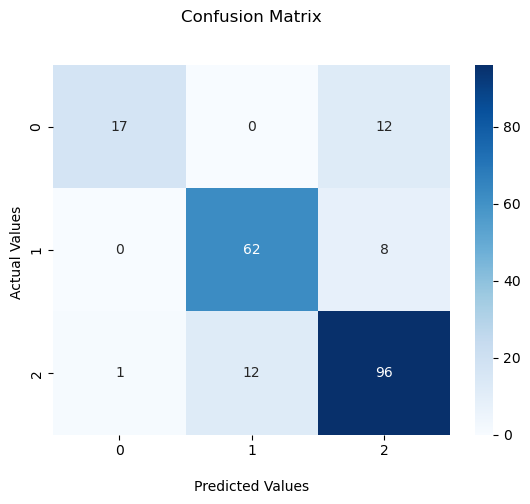

In [32]:
df_tresh['Lemmatized_Text'] = df_tresh['Lemmatized_Text'].apply(lambda x: ' '.join(x))
X = df_tresh[['Lemmatized_Text','WordsCounter','MovieNo']].copy()
y= df_tresh['H_V_N'].copy()
results_summary = heroes_vs_villains('BASIC - No Upper treshold, no lower treshold', X, y, results_summary, 520, df_tresh)

#### Result arround 81% show that data are not so easy for classification. Model confuse Heroes with neutral characters but not with villains. It can  also confuse Villains only with neutral characters. Neutral characters are confused with villains and heroes

Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best parameters: {'classifier__max_depth': 10, 'classifier__min_samples_leaf': 15, 'classifier__n_estimators': 500}
              precision    recall  f1-score   support

           0       0.33      0.55      0.41        29
           1       0.39      0.16      0.22        70
           2       0.60      0.72      0.65       109

    accuracy                           0.50       208
   macro avg       0.44      0.47      0.43       208
weighted avg       0.49      0.50      0.47       208



Character,True Label,Predicted,WordsCounter,Hero %,Villain %,Neutral %,Senten. %
John_Boyd_WolfEcho,2 (Neutral),0 (Hero),548,32.3,23.4,17.5,26.8
Cindy_Bush_PhoenixLight,1 (Villain),2 (Neutral),114,7.0,43.0,7.9,42.1
Jose_Jackson_DarkLion,1 (Villain),2 (Neutral),57,12.3,24.6,12.3,50.9
Andrew_Chaney_SeekerEclipse,2 (Neutral),0 (Hero),458,32.5,9.8,37.1,20.5
Kelly_Jensen_MoonTitan,1 (Villain),2 (Neutral),160,10.0,36.2,18.1,35.6
Jade_Smith_ScarletShadow,1 (Villain),2 (Neutral),46,17.4,34.8,8.7,39.1
Michaela_Kelly_StarHawk,0 (Hero),1 (Villain),261,32.6,14.6,7.7,45.2
Emily_Walker_BlazePhoenix,2 (Neutral),1 (Villain),92,32.6,14.1,15.2,38.0
Stephanie_Nelson_ShadowAsh,0 (Hero),2 (Neutral),183,37.7,10.4,13.1,38.8
Michael_White_MystSeeker,1 (Villain),0 (Hero),981,9.1,46.5,12.6,31.8


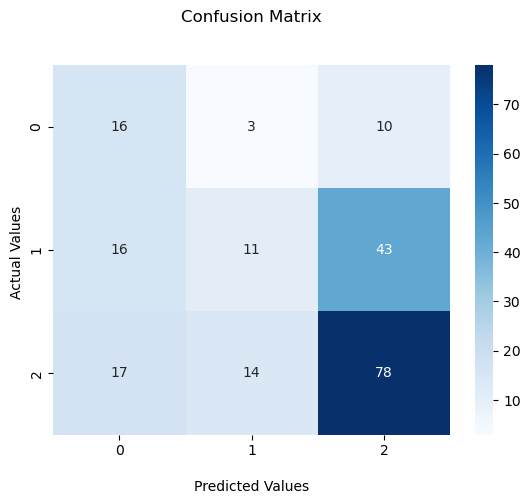

Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best parameters: {'classifier__max_depth': 10, 'classifier__min_samples_leaf': 10, 'classifier__n_estimators': 100}
              precision    recall  f1-score   support

           0       0.30      0.38      0.33        29
           1       0.23      0.13      0.16        70
           2       0.59      0.71      0.64       109

    accuracy                           0.47       208
   macro avg       0.37      0.40      0.38       208
weighted avg       0.43      0.47      0.44       208



Character,True Label,Predicted,WordsCounter,Hero %,Villain %,Neutral %,Senten. %
John_Boyd_WolfEcho,2 (Neutral),0 (Hero),548,32.3,23.4,17.5,26.8
Cindy_Bush_PhoenixLight,1 (Villain),2 (Neutral),114,7.0,43.0,7.9,42.1
Jose_Jackson_DarkLion,1 (Villain),2 (Neutral),57,12.3,24.6,12.3,50.9
Michael_Suarez_GalaxySoul,0 (Hero),2 (Neutral),295,28.8,9.8,16.6,44.7
Kelly_Jensen_MoonTitan,1 (Villain),2 (Neutral),160,10.0,36.2,18.1,35.6
Jade_Smith_ScarletShadow,1 (Villain),2 (Neutral),46,17.4,34.8,8.7,39.1
Jose_Lopez_FireMoon,1 (Villain),2 (Neutral),84,15.5,27.4,11.9,45.2
Michaela_Kelly_StarHawk,0 (Hero),2 (Neutral),261,32.6,14.6,7.7,45.2
Emily_Walker_BlazePhoenix,2 (Neutral),1 (Villain),92,32.6,14.1,15.2,38.0
Christopher_Frye_LunarAsh,2 (Neutral),1 (Villain),470,8.1,28.9,38.1,24.9


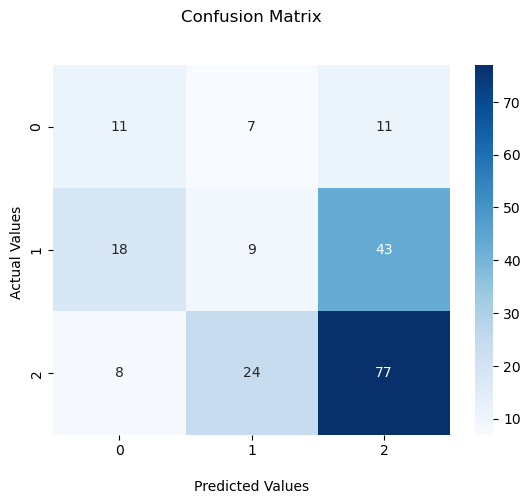

Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best parameters: {'classifier__max_depth': 10, 'classifier__min_samples_leaf': 10, 'classifier__n_estimators': 100}
              precision    recall  f1-score   support

           0       0.63      0.59      0.61        29
           1       0.44      0.34      0.39        70
           2       0.57      0.67      0.62       109

    accuracy                           0.55       208
   macro avg       0.55      0.53      0.54       208
weighted avg       0.54      0.55      0.54       208



Character,True Label,Predicted,WordsCounter,Hero %,Villain %,Neutral %,Senten. %
John_Boyd_WolfEcho,2 (Neutral),1 (Villain),548,32.3,23.4,17.5,26.8
Cindy_Bush_PhoenixLight,1 (Villain),2 (Neutral),114,7.0,43.0,7.9,42.1
Jose_Jackson_DarkLion,1 (Villain),2 (Neutral),57,12.3,24.6,12.3,50.9
Andrew_Chaney_SeekerEclipse,2 (Neutral),1 (Villain),458,32.5,9.8,37.1,20.5
Kelly_Jensen_MoonTitan,1 (Villain),2 (Neutral),160,10.0,36.2,18.1,35.6
Jade_Smith_ScarletShadow,1 (Villain),2 (Neutral),46,17.4,34.8,8.7,39.1
Jose_Lopez_FireMoon,1 (Villain),2 (Neutral),84,15.5,27.4,11.9,45.2
Emily_Walker_BlazePhoenix,2 (Neutral),1 (Villain),92,32.6,14.1,15.2,38.0
Christopher_Frye_LunarAsh,2 (Neutral),1 (Villain),470,8.1,28.9,38.1,24.9
Stephanie_Nelson_ShadowAsh,0 (Hero),2 (Neutral),183,37.7,10.4,13.1,38.8


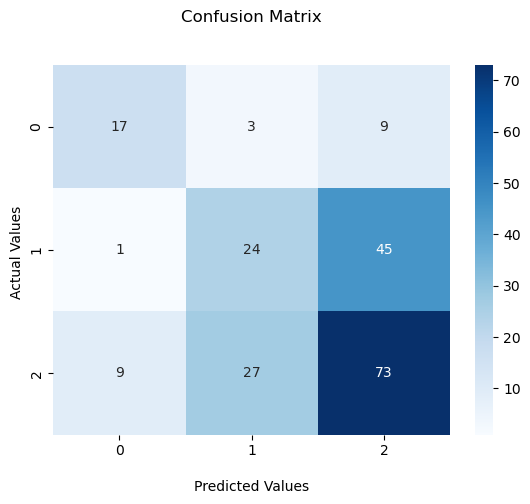

Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best parameters: {'classifier__max_depth': 10, 'classifier__min_samples_leaf': 10, 'classifier__n_estimators': 500}
              precision    recall  f1-score   support

           0       0.76      0.66      0.70        29
           1       0.58      0.44      0.50        70
           2       0.62      0.74      0.68       109

    accuracy                           0.63       208
   macro avg       0.66      0.61      0.63       208
weighted avg       0.63      0.63      0.62       208



Character,True Label,Predicted,WordsCounter,Hero %,Villain %,Neutral %,Senten. %
John_Boyd_WolfEcho,2 (Neutral),1 (Villain),548,32.3,23.4,17.5,26.8
Jose_Jackson_DarkLion,1 (Villain),2 (Neutral),57,12.3,24.6,12.3,50.9
Kelly_Jensen_MoonTitan,1 (Villain),2 (Neutral),160,10.0,36.2,18.1,35.6
Jade_Smith_ScarletShadow,1 (Villain),2 (Neutral),46,17.4,34.8,8.7,39.1
Jose_Lopez_FireMoon,1 (Villain),2 (Neutral),84,15.5,27.4,11.9,45.2
Christopher_Frye_LunarAsh,2 (Neutral),1 (Villain),470,8.1,28.9,38.1,24.9
Stephanie_Nelson_ShadowAsh,0 (Hero),2 (Neutral),183,37.7,10.4,13.1,38.8
Connie_Santos_FlameRider,0 (Hero),2 (Neutral),23,26.1,8.7,13.0,52.2
Jessica_Newton_BaneSoul,1 (Villain),2 (Neutral),81,7.4,39.5,13.6,39.5
Sean_Fox_SteelRaven,2 (Neutral),1 (Villain),471,10.8,34.2,19.1,35.9


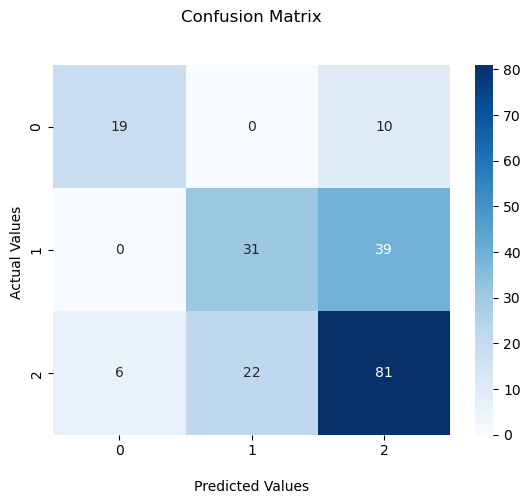

Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best parameters: {'classifier__max_depth': None, 'classifier__min_samples_leaf': 15, 'classifier__n_estimators': 1000}
              precision    recall  f1-score   support

           0       0.76      0.66      0.70        29
           1       0.67      0.71      0.69        70
           2       0.72      0.72      0.72       109

    accuracy                           0.71       208
   macro avg       0.72      0.70      0.70       208
weighted avg       0.71      0.71      0.71       208



Character,True Label,Predicted,WordsCounter,Hero %,Villain %,Neutral %,Senten. %
Jose_Jackson_DarkLion,1 (Villain),2 (Neutral),57,12.3,24.6,12.3,50.9
Michael_Suarez_GalaxySoul,0 (Hero),2 (Neutral),295,28.8,9.8,16.6,44.7
Kelly_Jensen_MoonTitan,1 (Villain),2 (Neutral),160,10.0,36.2,18.1,35.6
Jade_Smith_ScarletShadow,1 (Villain),2 (Neutral),46,17.4,34.8,8.7,39.1
Christopher_Frye_LunarAsh,2 (Neutral),1 (Villain),470,8.1,28.9,38.1,24.9
Stephanie_Nelson_ShadowAsh,0 (Hero),2 (Neutral),183,37.7,10.4,13.1,38.8
Connie_Santos_FlameRider,0 (Hero),2 (Neutral),23,26.1,8.7,13.0,52.2
Sean_Fox_SteelRaven,2 (Neutral),1 (Villain),471,10.8,34.2,19.1,35.9
Courtney_Taylor_BaneBreaker,1 (Villain),2 (Neutral),28,14.3,25.0,7.1,53.6
Peter_Harmon_EchoFlame,2 (Neutral),0 (Hero),545,33.6,7.3,34.9,24.2


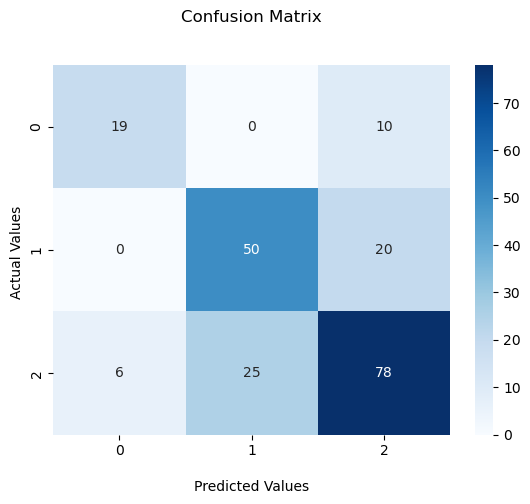

Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best parameters: {'classifier__max_depth': 10, 'classifier__min_samples_leaf': 15, 'classifier__n_estimators': 1000}
              precision    recall  f1-score   support

           0       0.76      0.66      0.70        29
           1       0.67      0.74      0.70        70
           2       0.73      0.71      0.72       109

    accuracy                           0.71       208
   macro avg       0.72      0.70      0.71       208
weighted avg       0.71      0.71      0.71       208



Character,True Label,Predicted,WordsCounter,Hero %,Villain %,Neutral %,Senten. %
Jose_Jackson_DarkLion,1 (Villain),2 (Neutral),57,12.3,24.6,12.3,50.9
Michael_Suarez_GalaxySoul,0 (Hero),2 (Neutral),295,28.8,9.8,16.6,44.7
Kelly_Jensen_MoonTitan,1 (Villain),2 (Neutral),160,10.0,36.2,18.1,35.6
Jade_Smith_ScarletShadow,1 (Villain),2 (Neutral),46,17.4,34.8,8.7,39.1
Jose_Lopez_FireMoon,1 (Villain),2 (Neutral),84,15.5,27.4,11.9,45.2
Michaela_Kelly_StarHawk,0 (Hero),2 (Neutral),261,32.6,14.6,7.7,45.2
Christopher_Frye_LunarAsh,2 (Neutral),1 (Villain),470,8.1,28.9,38.1,24.9
Stephanie_Nelson_ShadowAsh,0 (Hero),2 (Neutral),183,37.7,10.4,13.1,38.8
Connie_Santos_FlameRider,0 (Hero),2 (Neutral),23,26.1,8.7,13.0,52.2
Sean_Fox_SteelRaven,2 (Neutral),1 (Villain),471,10.8,34.2,19.1,35.9


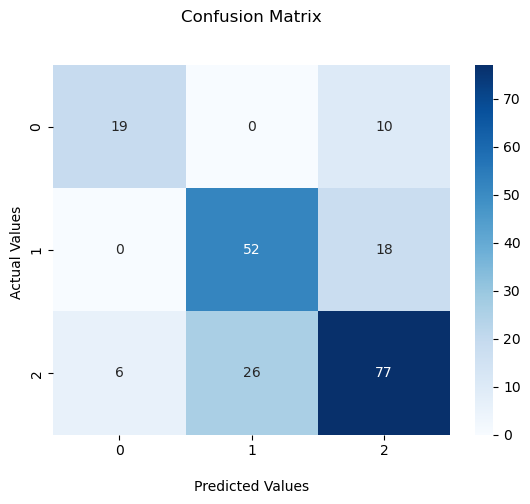

Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best parameters: {'classifier__max_depth': 10, 'classifier__min_samples_leaf': 10, 'classifier__n_estimators': 500}
              precision    recall  f1-score   support

           0       0.85      0.59      0.69        29
           1       0.76      0.86      0.81        70
           2       0.80      0.80      0.80       109

    accuracy                           0.79       208
   macro avg       0.80      0.75      0.77       208
weighted avg       0.79      0.79      0.79       208



Character,True Label,Predicted,WordsCounter,Hero %,Villain %,Neutral %,Senten. %
Michael_Suarez_GalaxySoul,0 (Hero),2 (Neutral),295,28.8,9.8,16.6,44.7
Kelly_Jensen_MoonTitan,1 (Villain),2 (Neutral),160,10.0,36.2,18.1,35.6
Stephanie_Nelson_ShadowAsh,0 (Hero),2 (Neutral),183,37.7,10.4,13.1,38.8
Connie_Santos_FlameRider,0 (Hero),2 (Neutral),23,26.1,8.7,13.0,52.2
Sean_Fox_SteelRaven,2 (Neutral),1 (Villain),471,10.8,34.2,19.1,35.9
Courtney_Taylor_BaneBreaker,1 (Villain),2 (Neutral),28,14.3,25.0,7.1,53.6
Matthew_Singleton_CrystalStar,0 (Hero),2 (Neutral),228,36.8,4.4,17.5,41.2
Peter_Harmon_EchoFlame,2 (Neutral),0 (Hero),545,33.6,7.3,34.9,24.2
Ashley_Price_NebulaVenom,2 (Neutral),1 (Villain),1086,9.4,15.7,33.3,41.5
Tony_Richardson_ObsidianBolt,2 (Neutral),1 (Villain),699,10.9,39.6,19.2,30.3


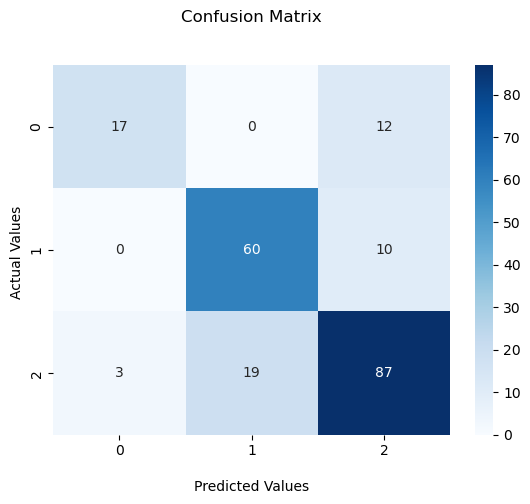

Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best parameters: {'classifier__max_depth': 10, 'classifier__min_samples_leaf': 10, 'classifier__n_estimators': 1000}
              precision    recall  f1-score   support

           0       0.85      0.59      0.69        29
           1       0.82      0.87      0.85        70
           2       0.82      0.85      0.83       109

    accuracy                           0.82       208
   macro avg       0.83      0.77      0.79       208
weighted avg       0.82      0.82      0.82       208



Character,True Label,Predicted,WordsCounter,Hero %,Villain %,Neutral %,Senten. %
Michael_Suarez_GalaxySoul,0 (Hero),2 (Neutral),295,28.8,9.8,16.6,44.7
Stephanie_Nelson_ShadowAsh,0 (Hero),2 (Neutral),183,37.7,10.4,13.1,38.8
Connie_Santos_FlameRider,0 (Hero),2 (Neutral),23,26.1,8.7,13.0,52.2
Sean_Fox_SteelRaven,2 (Neutral),1 (Villain),471,10.8,34.2,19.1,35.9
Matthew_Singleton_CrystalStar,0 (Hero),2 (Neutral),228,36.8,4.4,17.5,41.2
Peter_Harmon_EchoFlame,2 (Neutral),0 (Hero),545,33.6,7.3,34.9,24.2
Tony_Richardson_ObsidianBolt,2 (Neutral),1 (Villain),699,10.9,39.6,19.2,30.3
Robert_Garza_SunBurn,0 (Hero),2 (Neutral),144,40.3,13.2,16.0,30.6
Dustin_Hoffman_SteelFire,2 (Neutral),1 (Villain),59,13.6,27.1,10.2,49.2
Chad_Franklin_ShadowDragon,1 (Villain),2 (Neutral),230,13.9,26.5,18.7,40.9


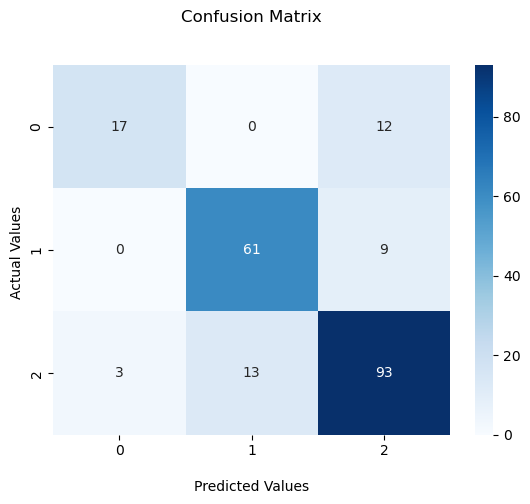

In [33]:
tfidf_max_features_list = [50, 100, 150, 200, 250, 300, 350, 400]
for i in tfidf_max_features_list:
    results_summary = heroes_vs_villains(f'No Upper/lower treshold, TF-IDF max features={i}', X, y, results_summary, i, df_tresh)

#### Now 6 models will be trained with 1600, 1300, 1000, 800, 600, 400 word limits to see what will happened with F1_macro score with using thresholds.


 RESULTS FOR UPPER TRESHOLD: 1600 WORDS 

Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best parameters: {'classifier__max_depth': 10, 'classifier__min_samples_leaf': 10, 'classifier__n_estimators': 2000}
              precision    recall  f1-score   support

           0       0.94      0.59      0.72        29
           1       0.82      0.89      0.85        70
           2       0.82      0.86      0.84       109

    accuracy                           0.83       208
   macro avg       0.86      0.78      0.81       208
weighted avg       0.84      0.83      0.83       208



Character,True Label,Predicted,WordsCounter,Hero %,Villain %,Neutral %,Senten. %
Michael_Suarez_GalaxySoul,0 (Hero),2 (Neutral),295,28.8,9.8,16.6,44.7
Stephanie_Nelson_ShadowAsh,0 (Hero),2 (Neutral),183,37.7,10.4,13.1,38.8
Connie_Santos_FlameRider,0 (Hero),2 (Neutral),23,26.1,8.7,13.0,52.2
Sean_Fox_SteelRaven,2 (Neutral),1 (Villain),471,10.8,34.2,19.1,35.9
Matthew_Singleton_CrystalStar,0 (Hero),2 (Neutral),228,36.8,4.4,17.5,41.2
Tony_Richardson_ObsidianBolt,2 (Neutral),1 (Villain),699,10.9,39.6,19.2,30.3
Robert_Garza_SunBurn,0 (Hero),2 (Neutral),144,40.3,13.2,16.0,30.6
Dustin_Hoffman_SteelFire,2 (Neutral),1 (Villain),59,13.6,27.1,10.2,49.2
Chad_Franklin_ShadowDragon,1 (Villain),2 (Neutral),230,13.9,26.5,18.7,40.9
John_Castaneda_SharkBolt,1 (Villain),2 (Neutral),152,13.8,29.6,15.1,41.4


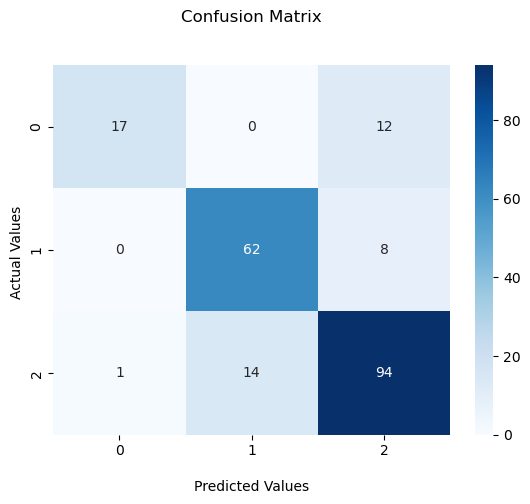


 RESULTS FOR UPPER TRESHOLD: 1300 WORDS 

Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best parameters: {'classifier__max_depth': None, 'classifier__min_samples_leaf': 10, 'classifier__n_estimators': 2000}
              precision    recall  f1-score   support

           0       0.94      0.59      0.72        29
           1       0.82      0.86      0.84        70
           2       0.81      0.87      0.84       109

    accuracy                           0.83       208
   macro avg       0.86      0.77      0.80       208
weighted avg       0.83      0.83      0.82       208



Character,True Label,Predicted,WordsCounter,Hero %,Villain %,Neutral %,Senten. %
Michael_Suarez_GalaxySoul,0 (Hero),2 (Neutral),295,28.8,9.8,16.6,44.7
Kelly_Jensen_MoonTitan,1 (Villain),2 (Neutral),160,10.0,36.2,18.1,35.6
Stephanie_Nelson_ShadowAsh,0 (Hero),2 (Neutral),183,37.7,10.4,13.1,38.8
Connie_Santos_FlameRider,0 (Hero),2 (Neutral),23,26.1,8.7,13.0,52.2
Sean_Fox_SteelRaven,2 (Neutral),1 (Villain),471,10.8,34.2,19.1,35.9
Matthew_Singleton_CrystalStar,0 (Hero),2 (Neutral),228,36.8,4.4,17.5,41.2
Tony_Richardson_ObsidianBolt,2 (Neutral),1 (Villain),699,10.9,39.6,19.2,30.3
Robert_Garza_SunBurn,0 (Hero),2 (Neutral),144,40.3,13.2,16.0,30.6
Dustin_Hoffman_SteelFire,2 (Neutral),1 (Villain),59,13.6,27.1,10.2,49.2
Chad_Franklin_ShadowDragon,1 (Villain),2 (Neutral),230,13.9,26.5,18.7,40.9


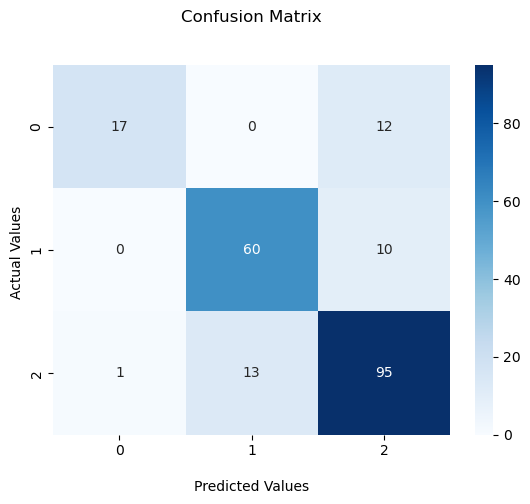


 RESULTS FOR UPPER TRESHOLD: 1000 WORDS 

Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best parameters: {'classifier__max_depth': 10, 'classifier__min_samples_leaf': 10, 'classifier__n_estimators': 2000}
              precision    recall  f1-score   support

           0       0.94      0.59      0.72        29
           1       0.81      0.90      0.85        70
           2       0.83      0.85      0.84       109

    accuracy                           0.83       208
   macro avg       0.86      0.78      0.81       208
weighted avg       0.84      0.83      0.83       208



Character,True Label,Predicted,WordsCounter,Hero %,Villain %,Neutral %,Senten. %
Michael_Suarez_GalaxySoul,0 (Hero),2 (Neutral),295,28.8,9.8,16.6,44.7
Kelly_Jensen_MoonTitan,1 (Villain),2 (Neutral),160,10.0,36.2,18.1,35.6
Stephanie_Nelson_ShadowAsh,0 (Hero),2 (Neutral),183,37.7,10.4,13.1,38.8
Connie_Santos_FlameRider,0 (Hero),2 (Neutral),23,26.1,8.7,13.0,52.2
Sean_Fox_SteelRaven,2 (Neutral),1 (Villain),471,10.8,34.2,19.1,35.9
Matthew_Singleton_CrystalStar,0 (Hero),2 (Neutral),228,36.8,4.4,17.5,41.2
Tony_Richardson_ObsidianBolt,2 (Neutral),1 (Villain),699,10.9,39.6,19.2,30.3
Robert_Garza_SunBurn,0 (Hero),2 (Neutral),144,40.3,13.2,16.0,30.6
Dustin_Hoffman_SteelFire,2 (Neutral),1 (Villain),59,13.6,27.1,10.2,49.2
Chad_Franklin_ShadowDragon,1 (Villain),2 (Neutral),230,13.9,26.5,18.7,40.9


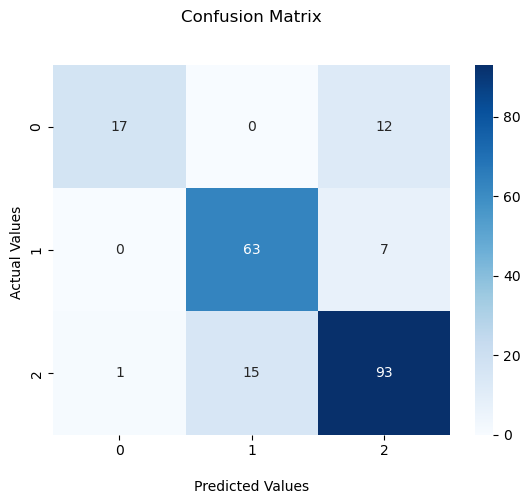


 RESULTS FOR UPPER TRESHOLD: 800 WORDS 

Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best parameters: {'classifier__max_depth': 10, 'classifier__min_samples_leaf': 10, 'classifier__n_estimators': 2000}
              precision    recall  f1-score   support

           0       1.00      0.59      0.74        29
           1       0.82      0.91      0.86        70
           2       0.84      0.87      0.86       109

    accuracy                           0.85       208
   macro avg       0.89      0.79      0.82       208
weighted avg       0.86      0.85      0.84       208



Character,True Label,Predicted,WordsCounter,Hero %,Villain %,Neutral %,Senten. %
Michael_Suarez_GalaxySoul,0 (Hero),2 (Neutral),295,28.8,9.8,16.6,44.7
Stephanie_Nelson_ShadowAsh,0 (Hero),2 (Neutral),183,37.7,10.4,13.1,38.8
Connie_Santos_FlameRider,0 (Hero),2 (Neutral),23,26.1,8.7,13.0,52.2
Sean_Fox_SteelRaven,2 (Neutral),1 (Villain),471,10.8,34.2,19.1,35.9
Matthew_Singleton_CrystalStar,0 (Hero),2 (Neutral),228,36.8,4.4,17.5,41.2
Tony_Richardson_ObsidianBolt,2 (Neutral),1 (Villain),699,10.9,39.6,19.2,30.3
Robert_Garza_SunBurn,0 (Hero),2 (Neutral),144,40.3,13.2,16.0,30.6
Dustin_Hoffman_SteelFire,2 (Neutral),1 (Villain),59,13.6,27.1,10.2,49.2
Chad_Franklin_ShadowDragon,1 (Villain),2 (Neutral),230,13.9,26.5,18.7,40.9
John_Castaneda_SharkBolt,1 (Villain),2 (Neutral),152,13.8,29.6,15.1,41.4


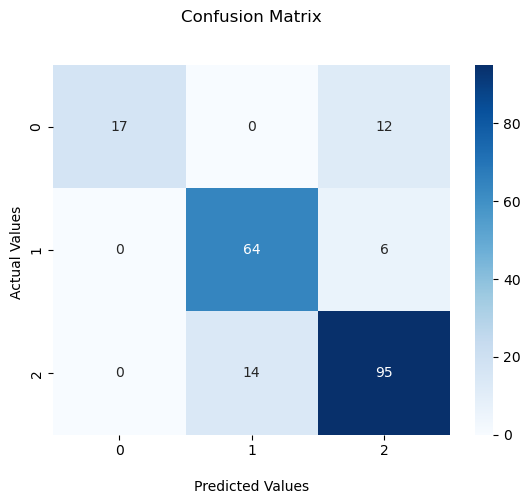


 RESULTS FOR UPPER TRESHOLD: 600 WORDS 

Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best parameters: {'classifier__max_depth': 10, 'classifier__min_samples_leaf': 10, 'classifier__n_estimators': 1000}
              precision    recall  f1-score   support

           0       0.95      0.66      0.78        29
           1       0.83      0.89      0.86        70
           2       0.84      0.87      0.86       109

    accuracy                           0.85       208
   macro avg       0.87      0.80      0.83       208
weighted avg       0.85      0.85      0.84       208



Character,True Label,Predicted,WordsCounter,Hero %,Villain %,Neutral %,Senten. %
Michael_Suarez_GalaxySoul,0 (Hero),2 (Neutral),295,28.8,9.8,16.6,44.7
Stephanie_Nelson_ShadowAsh,0 (Hero),2 (Neutral),183,37.7,10.4,13.1,38.8
Connie_Santos_FlameRider,0 (Hero),2 (Neutral),23,26.1,8.7,13.0,52.2
Sean_Fox_SteelRaven,2 (Neutral),1 (Villain),471,10.8,34.2,19.1,35.9
Peter_Harmon_EchoFlame,2 (Neutral),0 (Hero),545,33.6,7.3,34.9,24.2
Tony_Richardson_ObsidianBolt,2 (Neutral),1 (Villain),600,11.3,39.5,18.3,30.8
Robert_Garza_SunBurn,0 (Hero),2 (Neutral),144,40.3,13.2,16.0,30.6
Dustin_Hoffman_SteelFire,2 (Neutral),1 (Villain),59,13.6,27.1,10.2,49.2
Chad_Franklin_ShadowDragon,1 (Villain),2 (Neutral),230,13.9,26.5,18.7,40.9
John_Castaneda_SharkBolt,1 (Villain),2 (Neutral),152,13.8,29.6,15.1,41.4


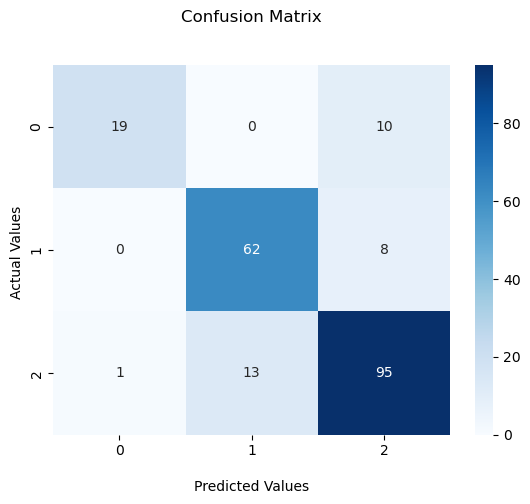


 RESULTS FOR UPPER TRESHOLD: 400 WORDS 

Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best parameters: {'classifier__max_depth': 10, 'classifier__min_samples_leaf': 10, 'classifier__n_estimators': 1000}
              precision    recall  f1-score   support

           0       0.95      0.62      0.75        29
           1       0.80      0.90      0.85        70
           2       0.84      0.84      0.84       109

    accuracy                           0.83       208
   macro avg       0.86      0.79      0.81       208
weighted avg       0.84      0.83      0.83       208



Character,True Label,Predicted,WordsCounter,Hero %,Villain %,Neutral %,Senten. %
Michael_Suarez_GalaxySoul,0 (Hero),2 (Neutral),295,28.8,9.8,16.6,44.7
Stephanie_Nelson_ShadowAsh,0 (Hero),2 (Neutral),183,37.7,10.4,13.1,38.8
Connie_Santos_FlameRider,0 (Hero),2 (Neutral),23,26.1,8.7,13.0,52.2
Sean_Fox_SteelRaven,2 (Neutral),1 (Villain),400,11.2,34.8,18.5,35.5
Peter_Harmon_EchoFlame,2 (Neutral),0 (Hero),400,35.8,7.8,33.2,23.2
Tony_Richardson_ObsidianBolt,2 (Neutral),1 (Villain),400,11.2,39.2,18.5,31.0
Robert_Garza_SunBurn,0 (Hero),2 (Neutral),144,40.3,13.2,16.0,30.6
Dustin_Hoffman_SteelFire,2 (Neutral),1 (Villain),59,13.6,27.1,10.2,49.2
Chad_Franklin_ShadowDragon,1 (Villain),2 (Neutral),230,13.9,26.5,18.7,40.9
John_Castaneda_SharkBolt,1 (Villain),2 (Neutral),152,13.8,29.6,15.1,41.4


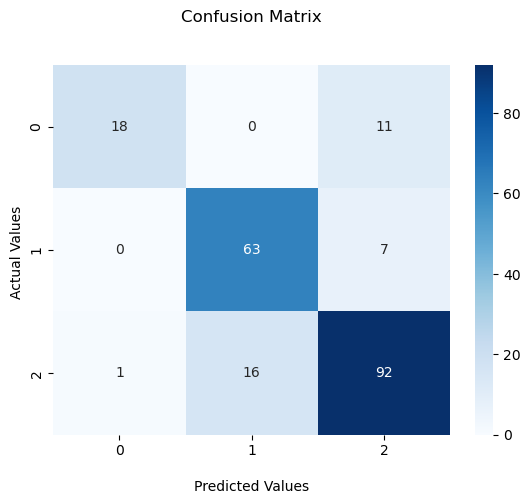

In [34]:
upper_treshold_list = [1600, 1300, 1000, 800, 600, 400]
upper_treshold_list.sort(reverse=True)
for i in upper_treshold_list:
    df_tresh['Lemmatized_Text'] = df_tresh['Lemmatized_Text'].apply(lambda x: x.split())
    df_tresh = words_reducer(df_tresh, i)
    df_tresh = words_calculation(df_tresh)
    df_tresh['Lemmatized_Text'] = df_tresh['Lemmatized_Text'].apply(lambda x: ' '.join(x))
    X = df_tresh[['Lemmatized_Text','WordsCounter','MovieNo']].copy()
    y= df_tresh['H_V_N'].copy()
    print(f"\n RESULTS FOR UPPER TRESHOLD: {i} WORDS \n")
    results_summary = heroes_vs_villains(f"Upper treshold {i} words, no lower treshold", X, y, results_summary, 520, df_tresh)

#### Now lower tresholds will be tested according to previous observations: 20, 40, 60, 80, 100, 150, 200, 300, 400. We will look for local optimum in range 20-150


 RESULTS FOR LOWER TRESHOLD: 20 WORDS 

Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best parameters: {'classifier__max_depth': None, 'classifier__min_samples_leaf': 15, 'classifier__n_estimators': 1000}
              precision    recall  f1-score   support

           0       0.89      0.86      0.87        28
           1       0.84      0.91      0.87        68
           2       0.90      0.86      0.88       107

    accuracy                           0.88       203
   macro avg       0.88      0.88      0.88       203
weighted avg       0.88      0.88      0.88       203



Character,True Label,Predicted,WordsCounter,Hero %,Villain %,Neutral %,Senten. %
Brian_Miller_IronNebula,2 (Neutral),0 (Hero),317,36.3,7.3,26.8,29.7
Melissa_Brown_TwilightHawk,2 (Neutral),1 (Villain),249,6.4,21.3,23.7,48.6
Jeffrey_Livingston_Seeker,1 (Villain),2 (Neutral),109,13.8,30.3,18.3,37.6
Gina_Pierce_SerpentGrim,1 (Villain),2 (Neutral),283,17.0,29.7,14.1,39.2
Daniel_Frazier_ClawComet,2 (Neutral),1 (Villain),106,14.2,33.0,20.8,32.1
Shawn_Mays_AlphaShade,2 (Neutral),1 (Villain),70,10.0,22.9,27.1,40.0
Derek_Mosley_OmegaEmerald,0 (Hero),2 (Neutral),276,25.4,13.4,15.6,45.7
Colleen_Sharp_LionVenom,2 (Neutral),1 (Villain),76,6.6,35.5,19.7,38.2
Amanda_Rodriguez_PlutoSpecter,1 (Villain),2 (Neutral),54,11.1,38.9,14.8,35.2
Kellie_Lopez_AshReaper,2 (Neutral),1 (Villain),167,17.4,35.9,9.6,37.1


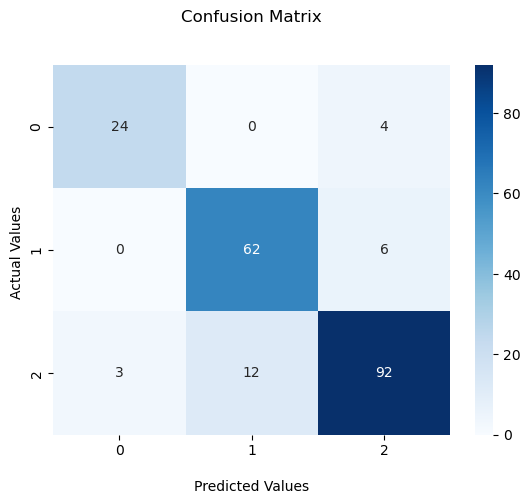


 RESULTS FOR LOWER TRESHOLD: 40 WORDS 

Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best parameters: {'classifier__max_depth': 10, 'classifier__min_samples_leaf': 15, 'classifier__n_estimators': 1000}
              precision    recall  f1-score   support

           0       0.75      0.75      0.75        28
           1       0.86      0.78      0.82        64
           2       0.80      0.85      0.82        99

    accuracy                           0.81       191
   macro avg       0.80      0.79      0.80       191
weighted avg       0.81      0.81      0.81       191



Character,True Label,Predicted,WordsCounter,Hero %,Villain %,Neutral %,Senten. %
Derek_Mosley_OmegaEmerald,0 (Hero),2 (Neutral),276,25.4,13.4,15.6,45.7
Jeffrey_Livingston_Seeker,1 (Villain),2 (Neutral),109,13.8,30.3,18.3,37.6
Richard_Allen_TwilightShade,2 (Neutral),1 (Villain),1357,24.0,36.7,14.7,24.6
Karen_Huang_ShadeOnyx,1 (Villain),2 (Neutral),58,12.1,37.9,17.2,32.8
Stephanie_Nelson_ShadowAsh,0 (Hero),2 (Neutral),183,37.7,10.4,13.1,38.8
Samantha_Humphrey_GrimNova,1 (Villain),2 (Neutral),44,13.6,43.2,11.4,31.8
Stephen_Fuentes_TigerPrime,1 (Villain),2 (Neutral),47,12.8,44.7,12.8,29.8
Shane_Flores_TitanCrypt,1 (Villain),2 (Neutral),76,13.2,35.5,15.8,35.5
Tyrone_James_OnyxPrime,2 (Neutral),0 (Hero),302,37.7,12.3,13.9,36.1
Fred_Stout_RogueCrypt,0 (Hero),2 (Neutral),90,45.6,10.0,6.7,37.8


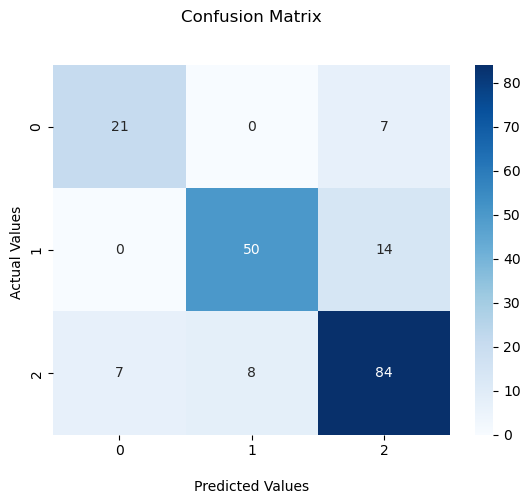


 RESULTS FOR LOWER TRESHOLD: 60 WORDS 

Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best parameters: {'classifier__max_depth': None, 'classifier__min_samples_leaf': 15, 'classifier__n_estimators': 2000}
              precision    recall  f1-score   support

           0       0.92      0.81      0.86        27
           1       0.83      0.93      0.88        58
           2       0.90      0.86      0.88        91

    accuracy                           0.88       176
   macro avg       0.88      0.87      0.87       176
weighted avg       0.88      0.88      0.87       176



Character,True Label,Predicted,WordsCounter,Hero %,Villain %,Neutral %,Senten. %
Tyrone_James_OnyxPrime,2 (Neutral),0 (Hero),302,37.7,12.3,13.9,36.1
Michael_Espinoza_ThunderOnyx,2 (Neutral),1 (Villain),83,9.6,22.9,19.3,48.2
Dawn_Oconnell_BloodBolt,1 (Villain),2 (Neutral),157,15.3,31.8,15.3,37.6
Zachary_Huerta_GrimShade,2 (Neutral),0 (Hero),1412,22.0,12.0,29.0,36.9
Susan_Kelly_GhostBlade,0 (Hero),2 (Neutral),149,28.2,3.4,12.8,55.7
Patricia_Weaver_CrystalFlame,1 (Villain),2 (Neutral),81,18.5,37.0,11.1,33.3
Travis_Woods_LightPhoenix,0 (Hero),2 (Neutral),92,42.4,10.9,10.9,35.9
Michelle_Zamora_FireStorm,0 (Hero),2 (Neutral),249,28.1,9.6,11.2,51.0
Claire_Greer_BoltRaven,2 (Neutral),1 (Villain),122,12.3,29.5,13.9,44.3
William_Nelson_StormClaw,2 (Neutral),1 (Villain),304,9.9,28.3,9.5,52.3


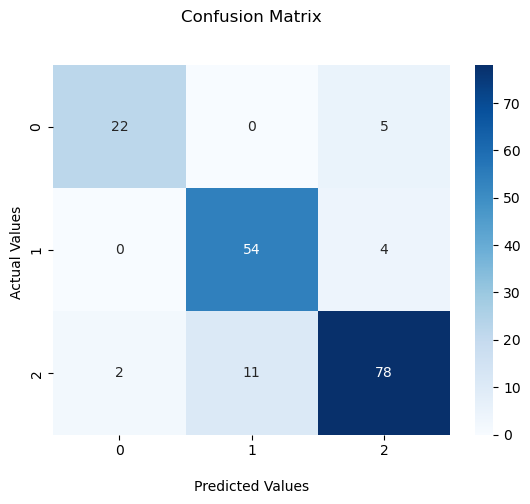


 RESULTS FOR LOWER TRESHOLD: 80 WORDS 

Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best parameters: {'classifier__max_depth': None, 'classifier__min_samples_leaf': 10, 'classifier__n_estimators': 100}
              precision    recall  f1-score   support

           0       0.94      0.65      0.77        26
           1       0.80      0.81      0.80        53
           2       0.79      0.86      0.82        83

    accuracy                           0.81       162
   macro avg       0.84      0.77      0.80       162
weighted avg       0.82      0.81      0.81       162



Character,True Label,Predicted,WordsCounter,Hero %,Villain %,Neutral %,Senten. %
Mark_Williams_EchoWind,1 (Villain),2 (Neutral),160,12.5,38.8,11.9,36.9
Andrea_Cunningham_CrystalFrost,0 (Hero),2 (Neutral),91,42.9,7.7,8.8,40.7
Victoria_Morales_ShadowAsh,2 (Neutral),1 (Villain),316,9.2,29.1,34.5,27.2
Ann_Phillips_CrystalFlame,0 (Hero),2 (Neutral),166,30.7,5.4,14.5,49.4
Robert_Garza_SunBurn,0 (Hero),2 (Neutral),144,40.3,13.2,16.0,30.6
Travis_Woods_LightPhoenix,0 (Hero),2 (Neutral),92,42.4,10.9,10.9,35.9
Matthew_Peters_LionInferno,2 (Neutral),1 (Villain),325,27.1,33.5,6.2,33.2
Michael_Stanley_AshReaper,2 (Neutral),1 (Villain),645,11.8,39.2,12.7,36.3
John_Castaneda_SharkBolt,1 (Villain),2 (Neutral),152,13.8,29.6,15.1,41.4
Gabriel_Hill_OnyxBlade,1 (Villain),2 (Neutral),88,12.5,27.3,11.4,48.9


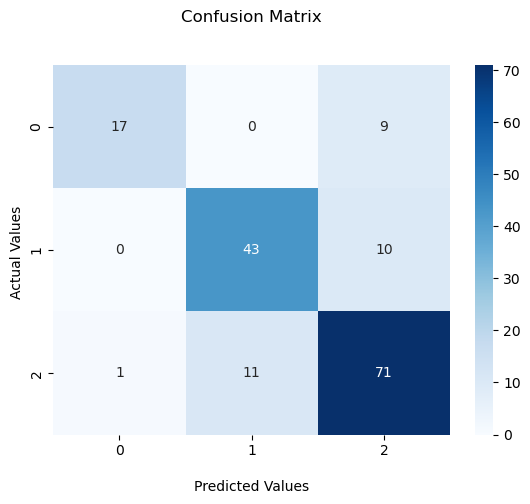


 RESULTS FOR LOWER TRESHOLD: 100 WORDS 

Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best parameters: {'classifier__max_depth': None, 'classifier__min_samples_leaf': 15, 'classifier__n_estimators': 1000}
              precision    recall  f1-score   support

           0       0.84      0.84      0.84        25
           1       0.95      0.83      0.88        46
           2       0.85      0.92      0.88        75

    accuracy                           0.88       146
   macro avg       0.88      0.86      0.87       146
weighted avg       0.88      0.88      0.88       146



Character,True Label,Predicted,WordsCounter,Hero %,Villain %,Neutral %,Senten. %
Tony_Richardson_ObsidianBolt,2 (Neutral),1 (Villain),699,10.9,39.6,19.2,30.3
Mia_Phillips_FlameRider,1 (Villain),2 (Neutral),103,6.8,36.9,14.6,41.7
Christopher_Ramirez_WindTalon,0 (Hero),2 (Neutral),145,35.9,4.8,9.7,49.7
Kristina_Hanna_SniperWolf,1 (Villain),2 (Neutral),123,8.1,39.0,15.4,37.4
Dawn_Oconnell_BloodBolt,1 (Villain),2 (Neutral),157,15.3,31.8,15.3,37.6
Anna_Allen_LightValkyrie,2 (Neutral),0 (Hero),365,34.5,17.8,7.7,40.0
Felicia_Allen_ScarletShark,2 (Neutral),0 (Hero),1562,34.2,10.2,36.2,19.4
Brooke_Reed_NovaShade,1 (Villain),2 (Neutral),275,18.2,27.3,13.1,41.5
Keith_Randall_DragonQuartz,2 (Neutral),0 (Hero),1976,33.0,19.3,15.2,32.4
Michael_Perez_SharkBolt,2 (Neutral),1 (Villain),152,13.8,34.2,20.4,31.6


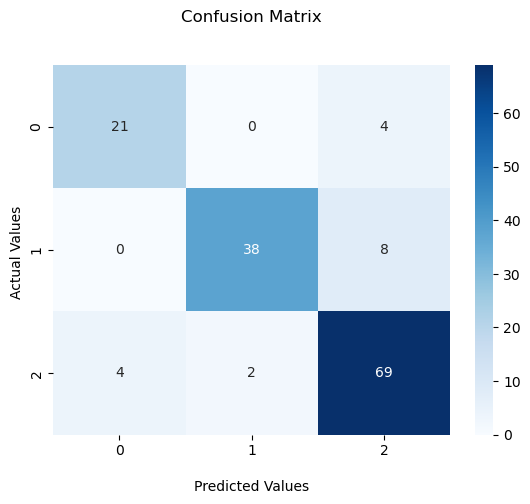


 RESULTS FOR LOWER TRESHOLD: 150 WORDS 

Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best parameters: {'classifier__max_depth': None, 'classifier__min_samples_leaf': 15, 'classifier__n_estimators': 500}
              precision    recall  f1-score   support

           0       0.89      0.71      0.79        24
           1       0.87      0.92      0.89        36
           2       0.84      0.88      0.86        59

    accuracy                           0.86       119
   macro avg       0.87      0.84      0.85       119
weighted avg       0.86      0.86      0.86       119



Character,True Label,Predicted,WordsCounter,Hero %,Villain %,Neutral %,Senten. %
Richard_Allen_TwilightShade,2 (Neutral),1 (Villain),1357,24.0,36.7,14.7,24.6
Bruce_Vaughn_OmegaEmerald,2 (Neutral),1 (Villain),492,8.1,43.1,6.5,42.3
Jacqueline_Barber_ThunderEagle,2 (Neutral),0 (Hero),282,38.7,6.4,18.8,36.2
Veronica_Lynch_EagleDark,1 (Villain),2 (Neutral),182,18.7,42.3,6.6,32.4
Patricia_Fernandez_GlitchStorm,0 (Hero),2 (Neutral),348,36.5,13.2,8.3,42.0
Chase_Simpson_GlitchStorm,0 (Hero),2 (Neutral),215,38.1,8.4,15.3,38.1
Kelly_Jensen_MoonTitan,1 (Villain),2 (Neutral),160,10.0,36.2,18.1,35.6
William_Murphy_StormRider,2 (Neutral),0 (Hero),329,32.8,11.2,8.2,47.7
Ann_Phillips_CrystalFlame,0 (Hero),2 (Neutral),166,30.7,5.4,14.5,49.4
Brianna_Williamson_MoonVoid,2 (Neutral),1 (Villain),584,6.8,38.2,11.1,43.8


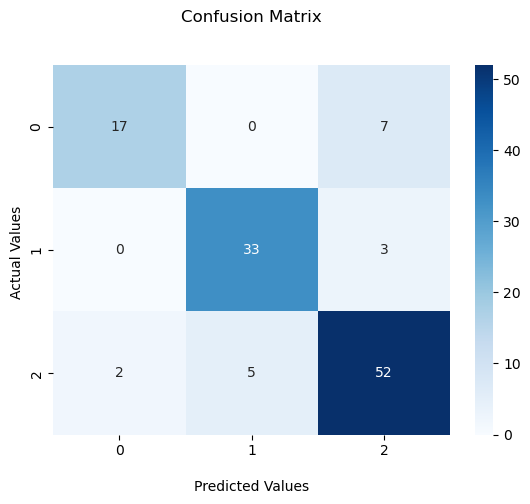


 RESULTS FOR LOWER TRESHOLD: 200 WORDS 

Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best parameters: {'classifier__max_depth': None, 'classifier__min_samples_leaf': 15, 'classifier__n_estimators': 1000}
              precision    recall  f1-score   support

           0       0.91      0.91      0.91        22
           1       0.88      0.93      0.90        30
           2       0.91      0.87      0.89        46

    accuracy                           0.90        98
   macro avg       0.90      0.90      0.90        98
weighted avg       0.90      0.90      0.90        98



Character,True Label,Predicted,WordsCounter,Hero %,Villain %,Neutral %,Senten. %
Robert_Brown_MarsPrime,2 (Neutral),1 (Villain),1506,8.2,38.6,14.3,38.8
Billy_Gordon_BloodFrost,2 (Neutral),0 (Hero),1625,32.9,9.7,26.9,30.5
Michael_Callahan_GhostPrime,1 (Villain),2 (Neutral),366,14.2,29.2,13.9,42.6
Brianna_Williamson_MoonVoid,2 (Neutral),1 (Villain),584,6.8,38.2,11.1,43.8
Debbie_Whitney_GrimShade,2 (Neutral),1 (Villain),297,10.1,30.3,12.1,47.5
Andrea_Carroll_IronNebula,2 (Neutral),0 (Hero),514,37.2,19.6,11.5,31.7
Connor_Campbell_StormPrime,0 (Hero),2 (Neutral),427,37.5,15.5,14.3,32.8
Tony_Richardson_ObsidianBolt,2 (Neutral),1 (Villain),699,10.9,39.6,19.2,30.3
Alan_Carter_OmegaEmerald,0 (Hero),2 (Neutral),213,33.3,15.0,16.0,35.7
Gina_Pierce_SerpentGrim,1 (Villain),2 (Neutral),283,17.0,29.7,14.1,39.2


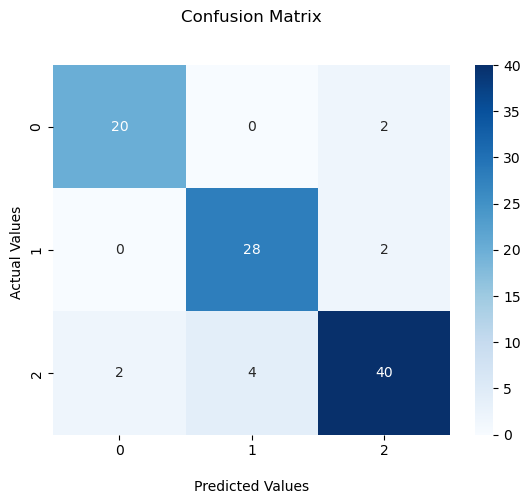


 RESULTS FOR LOWER TRESHOLD: 300 WORDS 

Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best parameters: {'classifier__max_depth': None, 'classifier__min_samples_leaf': 5, 'classifier__n_estimators': 500}
              precision    recall  f1-score   support

           0       0.80      0.67      0.73        18
           1       0.92      0.96      0.94        23
           2       0.79      0.84      0.81        31

    accuracy                           0.83        72
   macro avg       0.83      0.82      0.83        72
weighted avg       0.83      0.83      0.83        72



Character,True Label,Predicted,WordsCounter,Hero %,Villain %,Neutral %,Senten. %
Justin_Jones_DarkBlast,2 (Neutral),1 (Villain),892,21.0,26.6,7.1,45.4
Anna_Allen_LightValkyrie,2 (Neutral),0 (Hero),365,34.5,17.8,7.7,40.0
Antonio_Owens_MarsPrime,0 (Hero),2 (Neutral),304,30.6,12.5,13.2,43.8
William_Nelson_StormClaw,2 (Neutral),1 (Villain),304,9.9,28.3,9.5,52.3
Zachary_Huerta_GrimShade,2 (Neutral),0 (Hero),1412,22.0,12.0,29.0,36.9
Daniel_White_VenomHawk,0 (Hero),2 (Neutral),494,32.6,14.2,14.2,39.1
William_Wallace_LionVenom,0 (Hero),2 (Neutral),421,31.1,15.9,16.9,36.1
Thomas_Phillips_SpecterComet,0 (Hero),2 (Neutral),343,44.9,14.0,16.0,25.1
Connor_Campbell_StormPrime,0 (Hero),2 (Neutral),427,37.5,15.5,14.3,32.8
William_Murphy_StormRider,2 (Neutral),0 (Hero),329,32.8,11.2,8.2,47.7


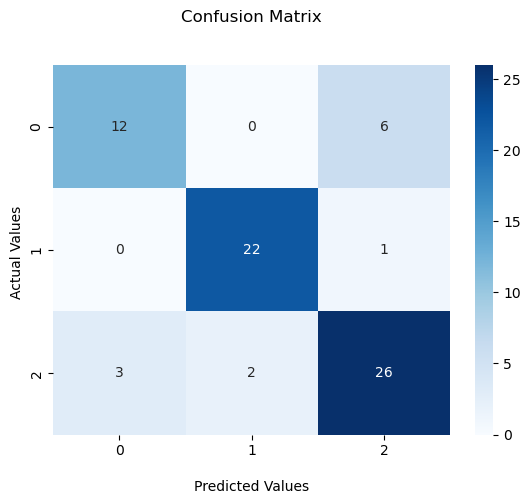


 RESULTS FOR LOWER TRESHOLD: 400 WORDS 

Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best parameters: {'classifier__max_depth': None, 'classifier__min_samples_leaf': 5, 'classifier__n_estimators': 100}
              precision    recall  f1-score   support

           0       0.81      0.93      0.87        14
           1       0.95      0.95      0.95        20
           2       0.89      0.80      0.84        20

    accuracy                           0.89        54
   macro avg       0.88      0.89      0.89        54
weighted avg       0.89      0.89      0.89        54



Character,True Label,Predicted,WordsCounter,Hero %,Villain %,Neutral %,Senten. %
Billy_Gordon_BloodFrost,2 (Neutral),0 (Hero),1625,32.9,9.7,26.9,30.5
Phyllis_Lewis_SniperWolf,1 (Villain),2 (Neutral),468,14.7,31.2,15.8,38.2
Jeffery_Perry_IronWolf,2 (Neutral),0 (Hero),482,19.1,8.9,23.0,49.0
Debbie_Walls_SpecterFang,2 (Neutral),0 (Hero),565,43.7,9.7,6.5,40.0
Chloe_Woods_EmeraldThorn,2 (Neutral),1 (Villain),592,10.0,32.4,18.8,38.9
Andrew_Pearson_ReaperDagger,0 (Hero),2 (Neutral),520,39.0,14.6,14.8,31.5


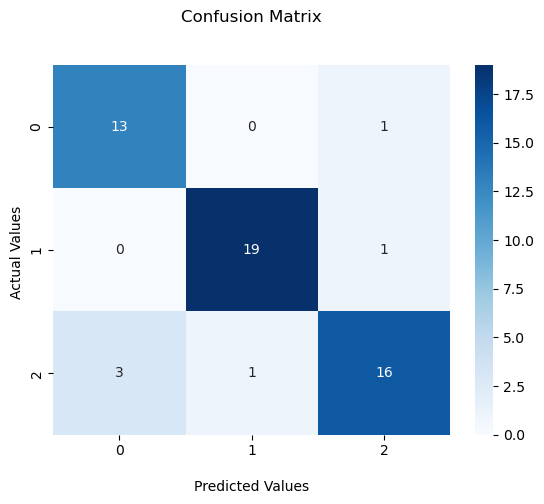

In [35]:
df['Lemmatized_Text'] = df['Lemmatized_Text'].apply(lambda x: ' '.join(x))
lower_treshold_list = [20, 40, 60, 80, 100, 150, 200, 300, 400]
for i in lower_treshold_list:
    X = df[['Lemmatized_Text','WordsCounter','MovieNo']][df['WordsCounter']>=i].copy()
    y= df['H_V_N'][df['WordsCounter']>=i].copy() 
    print(f"\n RESULTS FOR LOWER TRESHOLD: {i} WORDS \n")
    results_summary = heroes_vs_villains(f"No Upper treshold, lower treshold {i} words", X, y, results_summary, 520, df)

In [36]:
display(results_summary.style.hide(axis="index"))

Upper and lower treshold for words count,macro avg F1-score
"BASIC - No Upper treshold, no lower treshold",0.812616
"No Upper/lower treshold, TF-IDF max features=50",0.428249
"No Upper/lower treshold, TF-IDF max features=100",0.379545
"No Upper/lower treshold, TF-IDF max features=150",0.537628
"No Upper/lower treshold, TF-IDF max features=200",0.628531
"No Upper/lower treshold, TF-IDF max features=250",0.704084
"No Upper/lower treshold, TF-IDF max features=300",0.708678
"No Upper/lower treshold, TF-IDF max features=350",0.765804
"No Upper/lower treshold, TF-IDF max features=400",0.791727
"Upper treshold 1600 words, no lower treshold",0.805256


In [ ]:
# you can use this line to generate error that stop program execution at this point to analyse results and consider proper limits

## At this point analyse can be stopped
#### Now we can look in above table and consider what kind of combination of parameters can be run to optimize results. If program is not stopped, it can run with actual data, but results will not be optimized due to random nature of data. 

## FIRST SUMMARY and NEXT STEPS DISCUSSION

#### First results can be reviewed now. Basic result or avg F1-score is 0.81. All data were taken for classification without any tresholds. Grid search has found optimal hyperparameters values and model was trained and assessed with such values. Result is quite good but we try to optimize it. 
#### Second analyse was made for different values of TF IDF max_features defined in list. Max number of words is 440 and we observe how decreasing of this value will influence avg F1-score. If we look on the results in above table we can see that reults decrease if max_features values are decreased. It means that even using 400 words insted of 440 will cause worst results. It is possible that in range 400 - 440 there are some values that reduce noise and can help with result increase but it is not expected to get much better result. It can be tested later on. At this moment it seems that almost all words are important in learning process. 
#### Third analyse was made with reduction of max words ammount for characters that reached particular level (for example 1600 words). It means that word ammount of all characters with higher word count than defined value were decreased. In first run there will be no characters with word count higher then 1600, in second with 1300 etc. Results show that reduction of max words ammount give slight benefits at limit 800 words. What is interesting there is only one character above 800 limit that has wrong prediction (Zachary_Huerta_GrimShade) and this character do not appear on the list with wrong prediction when limit 800 is applied. At this level also few other characters are predicted more precisly. It seems that level of max 800 words can improve learning process slighty. Do not forget that random words are removed and for next analysis different words will be removen and it can influence whole process. 
#### Much more potential for result increase has Fourth analyse that show result increase when lower threshold is introduced. Limits 20 and 60 show 0.87 results and with limit of 200 words result is increased to 0.9. We need to have in mind that characters below those limit are not taken into consideration during training and assessment so in one hand we get rid of most problematic characters from second side we have better results for rest of characters due to more accurate training. If our goal is to get best result of classification and we are not interested in characters that have less then 200 words then such limit can be great solution. If our goal is to get best result with minimum minimal character loss then limit 20/60 can be considered. 

## Parameters proposal for final results optimization
#### Based on above table we will try to find best thresholds to get results as high as possible. For lower threshold we can use 20 or 60 words as threshold. If we use 20 we will have 203 test characters (whole set will have approx 1015 characters). It seems very slight reduction from Basic 208 test characters (1038 all characters). If the reduction is for 60 words we will get 176 test data characters (approx 880 all characters). Both values will be tested.
#### For upper treshold limit 800 words will be used. 600 and 400 words seems to be to radical drop of words number. Limit 1600 seems to be also good option for test because it is quite soft reduction and can work fine as second value for test. 
#### For TF-IDF max_feature we had lower result with 400 but we know that max_features number is 440. In such case It would be good idea to test above treshold with and without max_feature = 420. This test will show if small reduction of features will help with noise reduction. As second trial we can use 430 to find out if so small reduction will have any impact. 
#### It would be interesting to run same parameters two times to check if random character of words reduction bring large variation to learning and assessment process (2nd run) 

#### First test parameters (same for 2nd run)
#### lower_treshold = 60
#### upper_threshold = 800
#### tfidf_best_max_feature = 420

In [39]:
df_tresh = copy.deepcopy(df)
df_tresh['Lemmatized_Text'] = df_tresh['Lemmatized_Text'].apply(lambda x: x.split())

# Here we can type optimal values from previous analysis.
lower_treshold = 60
upper_threshold = 800
tfidf_best_max_feature = 420


 RESULTS FOR UPPER TRESHOLD=800 WORDS & FOR LOWER TRESHOLD=60 

Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best parameters: {'classifier__max_depth': None, 'classifier__min_samples_leaf': 15, 'classifier__n_estimators': 2000}
              precision    recall  f1-score   support

           0       0.96      0.85      0.90        27
           1       0.83      0.91      0.87        58
           2       0.90      0.87      0.88        91

    accuracy                           0.88       176
   macro avg       0.89      0.88      0.88       176
weighted avg       0.88      0.88      0.88       176



Character,True Label,Predicted,WordsCounter,Hero %,Villain %,Neutral %,Senten. %
Michael_Espinoza_ThunderOnyx,2 (Neutral),1 (Villain),83,9.6,22.9,19.3,48.2
Dawn_Oconnell_BloodBolt,1 (Villain),2 (Neutral),157,15.3,31.8,15.3,37.6
Zachary_Huerta_GrimShade,2 (Neutral),0 (Hero),800,20.0,12.9,30.1,37.0
Brooke_Reed_NovaShade,1 (Villain),2 (Neutral),275,18.2,27.3,13.1,41.5
Susan_Kelly_GhostBlade,0 (Hero),2 (Neutral),149,28.2,3.4,12.8,55.7
Patricia_Weaver_CrystalFlame,1 (Villain),2 (Neutral),81,18.5,37.0,11.1,33.3
Travis_Woods_LightPhoenix,0 (Hero),2 (Neutral),92,42.4,10.9,10.9,35.9
Claire_Greer_BoltRaven,2 (Neutral),1 (Villain),122,12.3,29.5,13.9,44.3
William_Nelson_StormClaw,2 (Neutral),1 (Villain),304,9.9,28.3,9.5,52.3
Colleen_Sharp_LionVenom,2 (Neutral),1 (Villain),76,6.6,35.5,19.7,38.2


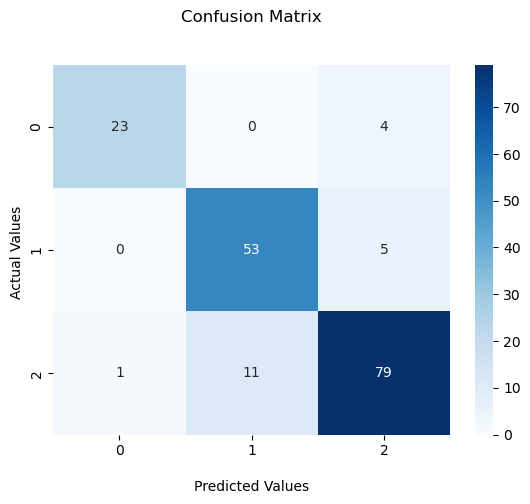


 RESULTS FOR UPPER TRESHOLD=800 WORDS & FOR LOWER TRESHOLD=60 & TFIDF BEST MAX_FEATURES=420 

Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best parameters: {'classifier__max_depth': None, 'classifier__min_samples_leaf': 10, 'classifier__n_estimators': 1000}
              precision    recall  f1-score   support

           0       1.00      0.85      0.92        27
           1       0.85      0.90      0.87        58
           2       0.89      0.90      0.90        91

    accuracy                           0.89       176
   macro avg       0.91      0.88      0.90       176
weighted avg       0.90      0.89      0.89       176



Character,True Label,Predicted,WordsCounter,Hero %,Villain %,Neutral %,Senten. %
Michael_Espinoza_ThunderOnyx,2 (Neutral),1 (Villain),83,9.6,22.9,19.3,48.2
Dawn_Oconnell_BloodBolt,1 (Villain),2 (Neutral),157,15.3,31.8,15.3,37.6
Brooke_Reed_NovaShade,1 (Villain),2 (Neutral),275,18.2,27.3,13.1,41.5
Susan_Kelly_GhostBlade,0 (Hero),2 (Neutral),149,28.2,3.4,12.8,55.7
Patricia_Weaver_CrystalFlame,1 (Villain),2 (Neutral),81,18.5,37.0,11.1,33.3
Travis_Woods_LightPhoenix,0 (Hero),2 (Neutral),92,42.4,10.9,10.9,35.9
Claire_Greer_BoltRaven,2 (Neutral),1 (Villain),122,12.3,29.5,13.9,44.3
William_Nelson_StormClaw,2 (Neutral),1 (Villain),304,9.9,28.3,9.5,52.3
Colleen_Sharp_LionVenom,2 (Neutral),1 (Villain),76,6.6,35.5,19.7,38.2
Ricardo_Jones_AlphaBlast,0 (Hero),2 (Neutral),412,27.2,10.9,18.4,43.4


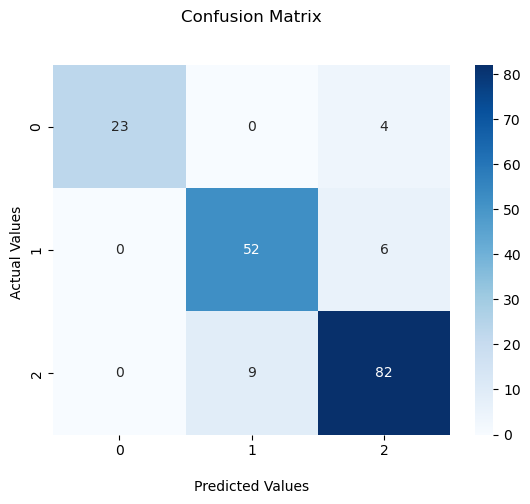

In [40]:
df_tresh = words_reducer(df_tresh, upper_threshold)
df_tresh = words_calculation(df_tresh)
df_tresh['Lemmatized_Text'] = df_tresh['Lemmatized_Text'].apply(lambda x: ' '.join(x))
X = df_tresh[['Lemmatized_Text','WordsCounter','MovieNo']][df_tresh['WordsCounter']>=lower_treshold].copy()
y= df_tresh['H_V_N'][df_tresh['WordsCounter']>=lower_treshold].copy() 

# LOWER and UPPER tresholds
print(f"\n RESULTS FOR UPPER TRESHOLD={upper_threshold} WORDS & FOR LOWER TRESHOLD={lower_treshold} \n")
results_summary = heroes_vs_villains(f"Upper treshold {upper_threshold} words, lower treshold {lower_treshold}", X, y, results_summary, 520, df_tresh)

# LOWER and UPPER tresholds & TFIDF 
print(f"\n RESULTS FOR UPPER TRESHOLD={upper_threshold} WORDS & FOR LOWER TRESHOLD={lower_treshold} & TFIDF BEST MAX_FEATURES={tfidf_best_max_feature} \n")
results_summary = heroes_vs_villains(f"Upper treshold {upper_threshold}, lower treshold {lower_treshold}, best TFIDF max_features={tfidf_best_max_feature}", X, y, results_summary, tfidf_best_max_feature, df_tresh)


#### Below 2nd run of same parameters

In [41]:
df_tresh = copy.deepcopy(df)
df_tresh['Lemmatized_Text'] = df_tresh['Lemmatized_Text'].apply(lambda x: x.split())

# Here we can type optimal values from previous analysis.
lower_treshold = 60
upper_threshold = 800
tfidf_best_max_feature = 420


 RESULTS FOR UPPER TRESHOLD=800 WORDS & FOR LOWER TRESHOLD=60 

Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best parameters: {'classifier__max_depth': None, 'classifier__min_samples_leaf': 15, 'classifier__n_estimators': 1000}
              precision    recall  f1-score   support

           0       0.96      0.89      0.92        27
           1       0.84      0.91      0.88        58
           2       0.91      0.88      0.89        91

    accuracy                           0.89       176
   macro avg       0.90      0.89      0.90       176
weighted avg       0.89      0.89      0.89       176



Character,True Label,Predicted,WordsCounter,Hero %,Villain %,Neutral %,Senten. %
Tyrone_James_OnyxPrime,2 (Neutral),0 (Hero),302,37.7,12.3,13.9,36.1
Michael_Espinoza_ThunderOnyx,2 (Neutral),1 (Villain),83,9.6,22.9,19.3,48.2
Dawn_Oconnell_BloodBolt,1 (Villain),2 (Neutral),157,15.3,31.8,15.3,37.6
Brooke_Reed_NovaShade,1 (Villain),2 (Neutral),275,18.2,27.3,13.1,41.5
Susan_Kelly_GhostBlade,0 (Hero),2 (Neutral),149,28.2,3.4,12.8,55.7
Patricia_Weaver_CrystalFlame,1 (Villain),2 (Neutral),81,18.5,37.0,11.1,33.3
Travis_Woods_LightPhoenix,0 (Hero),2 (Neutral),92,42.4,10.9,10.9,35.9
Claire_Greer_BoltRaven,2 (Neutral),1 (Villain),122,12.3,29.5,13.9,44.3
William_Nelson_StormClaw,2 (Neutral),1 (Villain),304,9.9,28.3,9.5,52.3
Colleen_Sharp_LionVenom,2 (Neutral),1 (Villain),76,6.6,35.5,19.7,38.2


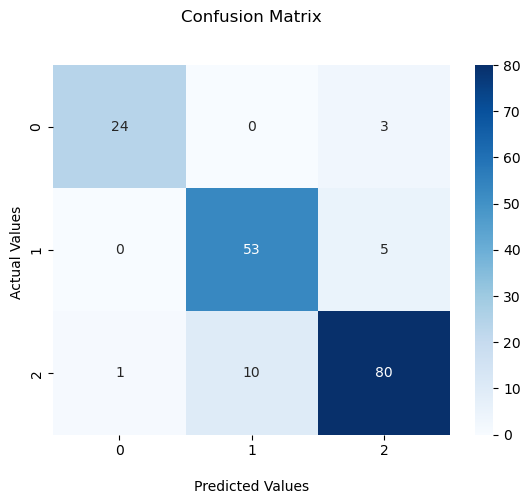


 RESULTS FOR UPPER TRESHOLD=800 WORDS & FOR LOWER TRESHOLD=60 & TFIDF BEST MAX_FEATURES=420 

Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best parameters: {'classifier__max_depth': None, 'classifier__min_samples_leaf': 10, 'classifier__n_estimators': 500}
              precision    recall  f1-score   support

           0       1.00      0.85      0.92        27
           1       0.83      0.93      0.88        58
           2       0.91      0.88      0.89        91

    accuracy                           0.89       176
   macro avg       0.91      0.89      0.90       176
weighted avg       0.90      0.89      0.89       176



Character,True Label,Predicted,WordsCounter,Hero %,Villain %,Neutral %,Senten. %
Michael_Espinoza_ThunderOnyx,2 (Neutral),1 (Villain),83,9.6,22.9,19.3,48.2
Dawn_Oconnell_BloodBolt,1 (Villain),2 (Neutral),157,15.3,31.8,15.3,37.6
Brooke_Reed_NovaShade,1 (Villain),2 (Neutral),275,18.2,27.3,13.1,41.5
Susan_Kelly_GhostBlade,0 (Hero),2 (Neutral),149,28.2,3.4,12.8,55.7
Patricia_Weaver_CrystalFlame,1 (Villain),2 (Neutral),81,18.5,37.0,11.1,33.3
Travis_Woods_LightPhoenix,0 (Hero),2 (Neutral),92,42.4,10.9,10.9,35.9
Michelle_Zamora_FireStorm,0 (Hero),2 (Neutral),249,28.1,9.6,11.2,51.0
Claire_Greer_BoltRaven,2 (Neutral),1 (Villain),122,12.3,29.5,13.9,44.3
William_Nelson_StormClaw,2 (Neutral),1 (Villain),304,9.9,28.3,9.5,52.3
Colleen_Sharp_LionVenom,2 (Neutral),1 (Villain),76,6.6,35.5,19.7,38.2


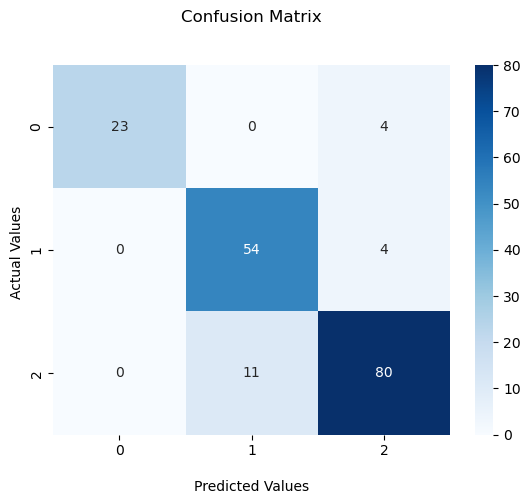

In [42]:
df_tresh = words_reducer(df_tresh, upper_threshold)
df_tresh = words_calculation(df_tresh)
df_tresh['Lemmatized_Text'] = df_tresh['Lemmatized_Text'].apply(lambda x: ' '.join(x))
X = df_tresh[['Lemmatized_Text','WordsCounter','MovieNo']][df_tresh['WordsCounter']>=lower_treshold].copy()
y= df_tresh['H_V_N'][df_tresh['WordsCounter']>=lower_treshold].copy() 

# LOWER and UPPER tresholds
print(f"\n RESULTS FOR UPPER TRESHOLD={upper_threshold} WORDS & FOR LOWER TRESHOLD={lower_treshold} \n")
results_summary = heroes_vs_villains(f"2nd run Upper treshold {upper_threshold} words, lower treshold {lower_treshold}", X, y, results_summary, 520, df_tresh)

# LOWER and UPPER tresholds & TFIDF 
print(f"\n RESULTS FOR UPPER TRESHOLD={upper_threshold} WORDS & FOR LOWER TRESHOLD={lower_treshold} & TFIDF BEST MAX_FEATURES={tfidf_best_max_feature} \n")
results_summary = heroes_vs_villains(f"2nd run Upper treshold {upper_threshold}, lower treshold {lower_treshold}, best TFIDF max_features={tfidf_best_max_feature}", X, y, results_summary, tfidf_best_max_feature, df_tresh)


#### Below another trial with different set of parameters:
#### lower_treshold = 20
#### upper_threshold = 1600
#### tfidf_best_max_feature = 430

In [43]:
df_tresh = copy.deepcopy(df)
df_tresh['Lemmatized_Text'] = df_tresh['Lemmatized_Text'].apply(lambda x: x.split())

# Here we can type optimal values from previous analysis.
lower_treshold = 20
upper_threshold = 1600
tfidf_best_max_feature = 430


 RESULTS FOR UPPER TRESHOLD=1600 WORDS & FOR LOWER TRESHOLD=20 

Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best parameters: {'classifier__max_depth': 10, 'classifier__min_samples_leaf': 10, 'classifier__n_estimators': 1000}
              precision    recall  f1-score   support

           0       0.91      0.71      0.80        28
           1       0.87      0.88      0.88        68
           2       0.86      0.90      0.88       107

    accuracy                           0.87       203
   macro avg       0.88      0.83      0.85       203
weighted avg       0.87      0.87      0.87       203



Character,True Label,Predicted,WordsCounter,Hero %,Villain %,Neutral %,Senten. %
Brian_Miller_IronNebula,2 (Neutral),0 (Hero),317,36.3,7.3,26.8,29.7
Jeffrey_Livingston_Seeker,1 (Villain),2 (Neutral),109,13.8,30.3,18.3,37.6
Gina_Pierce_SerpentGrim,1 (Villain),2 (Neutral),283,17.0,29.7,14.1,39.2
Michael_Foster_StormTiger,2 (Neutral),1 (Villain),44,18.2,27.3,11.4,43.2
George_Kelly_ShadeOnyx,0 (Hero),2 (Neutral),367,28.9,15.8,13.1,42.2
Derek_Mosley_OmegaEmerald,0 (Hero),2 (Neutral),276,25.4,13.4,15.6,45.7
Colleen_Sharp_LionVenom,2 (Neutral),1 (Villain),76,6.6,35.5,19.7,38.2
Megan_Weber_EchoEagle,2 (Neutral),1 (Villain),118,10.2,31.4,16.1,42.4
Amanda_Rodriguez_PlutoSpecter,1 (Villain),2 (Neutral),54,11.1,38.9,14.8,35.2
Sean_Fox_SteelRaven,2 (Neutral),1 (Villain),471,10.8,34.2,19.1,35.9


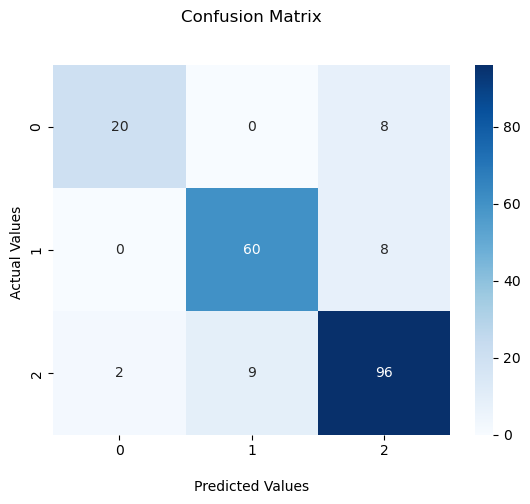


 RESULTS FOR UPPER TRESHOLD=1600 WORDS & FOR LOWER TRESHOLD=20 & TFIDF BEST MAX_FEATURES=430 

Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best parameters: {'classifier__max_depth': 10, 'classifier__min_samples_leaf': 15, 'classifier__n_estimators': 2000}
              precision    recall  f1-score   support

           0       0.89      0.86      0.87        28
           1       0.85      0.91      0.88        68
           2       0.90      0.87      0.89       107

    accuracy                           0.88       203
   macro avg       0.88      0.88      0.88       203
weighted avg       0.88      0.88      0.88       203



Character,True Label,Predicted,WordsCounter,Hero %,Villain %,Neutral %,Senten. %
Brian_Miller_IronNebula,2 (Neutral),0 (Hero),317,36.3,7.3,26.8,29.7
Jeffrey_Livingston_Seeker,1 (Villain),2 (Neutral),109,13.8,30.3,18.3,37.6
Gina_Pierce_SerpentGrim,1 (Villain),2 (Neutral),283,17.0,29.7,14.1,39.2
Daniel_Frazier_ClawComet,2 (Neutral),1 (Villain),106,14.2,33.0,20.8,32.1
Derek_Mosley_OmegaEmerald,0 (Hero),2 (Neutral),276,25.4,13.4,15.6,45.7
Karen_Chandler_NightFury,2 (Neutral),1 (Villain),102,11.8,33.3,34.3,20.6
Colleen_Sharp_LionVenom,2 (Neutral),1 (Villain),76,6.6,35.5,19.7,38.2
Megan_Weber_EchoEagle,2 (Neutral),1 (Villain),118,10.2,31.4,16.1,42.4
Amanda_Rodriguez_PlutoSpecter,1 (Villain),2 (Neutral),54,11.1,38.9,14.8,35.2
Kellie_Lopez_AshReaper,2 (Neutral),1 (Villain),167,17.4,35.9,9.6,37.1


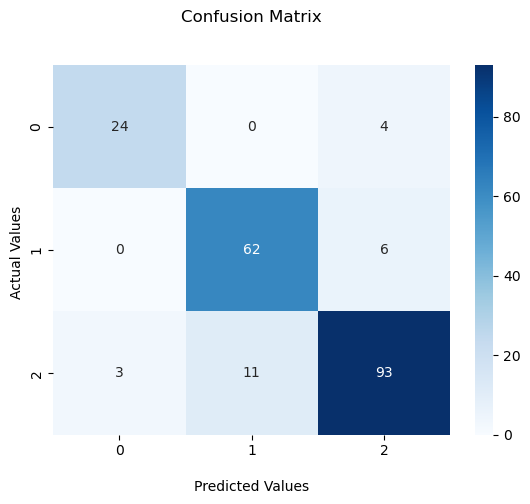

In [44]:
df_tresh = words_reducer(df_tresh, upper_threshold)
df_tresh = words_calculation(df_tresh)
df_tresh['Lemmatized_Text'] = df_tresh['Lemmatized_Text'].apply(lambda x: ' '.join(x))
X = df_tresh[['Lemmatized_Text','WordsCounter','MovieNo']][df_tresh['WordsCounter']>=lower_treshold].copy()
y= df_tresh['H_V_N'][df_tresh['WordsCounter']>=lower_treshold].copy() 

# LOWER and UPPER tresholds
print(f"\n RESULTS FOR UPPER TRESHOLD={upper_threshold} WORDS & FOR LOWER TRESHOLD={lower_treshold} \n")
results_summary = heroes_vs_villains(f"Upper treshold {upper_threshold} words, lower treshold {lower_treshold}", X, y, results_summary, 520, df_tresh)

# LOWER and UPPER tresholds & TFIDF 
print(f"\n RESULTS FOR UPPER TRESHOLD={upper_threshold} WORDS & FOR LOWER TRESHOLD={lower_treshold} & TFIDF BEST MAX_FEATURES={tfidf_best_max_feature} \n")
results_summary = heroes_vs_villains(f"Upper treshold {upper_threshold}, lower treshold {lower_treshold}, best TFIDF max_features={tfidf_best_max_feature}", X, y, results_summary, tfidf_best_max_feature, df_tresh)


#### As last step we will check binary classification and use only Heroes and Villains to chack how Random Forest classifier will cope with "Good and Evil" recognition. It will be much easier task because it need to deal with only 2 groups so we expect much better results. 

Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best parameters: {'classifier__max_depth': 10, 'classifier__min_samples_leaf': 5, 'classifier__n_estimators': 500}
              precision    recall  f1-score   support

           0       1.00      0.90      0.95        29
           1       0.96      1.00      0.98        71

    accuracy                           0.97       100
   macro avg       0.98      0.95      0.96       100
weighted avg       0.97      0.97      0.97       100



Character,True Label,Predicted,WordsCounter,Hero %,Villain %,Neutral %,Senten. %
Emily_Giles_OnyxBlade,0 (Hero),1 (Villain),44,43.2,9.1,6.8,40.9
Connie_Santos_FlameRider,0 (Hero),1 (Villain),23,26.1,8.7,13.0,52.2
Christopher_Hudson_MystSeeker,0 (Hero),1 (Villain),157,24.8,15.3,17.8,42.0


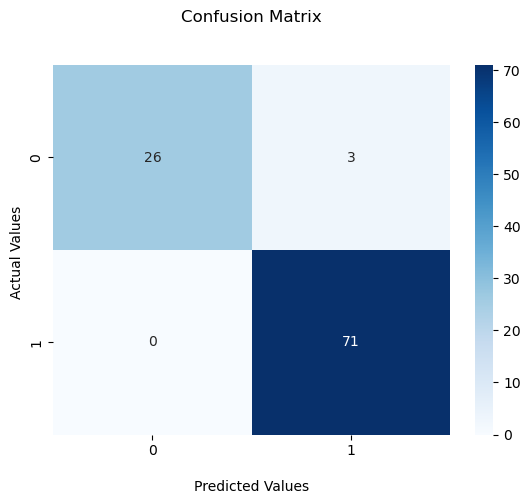

In [45]:
X = df[['Lemmatized_Text','WordsCounter','MovieNo']][df['H_V_N']!=2].copy()
y= df['H_V_N'][df['H_V_N']!=2].copy() 
results_summary = heroes_vs_villains("HEROES vs VILLAINS only, no tresholds", X, y, results_summary, 520, df)

In [46]:
display(results_summary.style.hide(axis="index"))

Upper and lower treshold for words count,macro avg F1-score
"BASIC - No Upper treshold, no lower treshold",0.812616
"No Upper/lower treshold, TF-IDF max features=50",0.428249
"No Upper/lower treshold, TF-IDF max features=100",0.379545
"No Upper/lower treshold, TF-IDF max features=150",0.537628
"No Upper/lower treshold, TF-IDF max features=200",0.628531
"No Upper/lower treshold, TF-IDF max features=250",0.704084
"No Upper/lower treshold, TF-IDF max features=300",0.708678
"No Upper/lower treshold, TF-IDF max features=350",0.765804
"No Upper/lower treshold, TF-IDF max features=400",0.791727
"Upper treshold 1600 words, no lower treshold",0.805256


## SECOND SUMMARY 
#### If we take a look on the table for Basic model results we will see that 13 characters with wrong prediction had number of words in range 0-99. Another 15 characters in range 100-299. For range 300 till 700 words we got 4 characters and one character with 1412 words. Overal 33 characters. It means that characters with lower number of words are most problematic for assesment and can negatively impact learning process itself. 8 characters were problemetic below limit of 60 words. 
#### Best result were achieved with Upper treshold 800 words, lower treshold 60. Usage of max_features=420 seems to have slight positive influence in case of repetition of the learning and assessment process. In 1st and 2nd run we recevie very similar result (random words were removed two times to limit 800). Without usage of max_feature variation of result is slighty higher. 
#### For tresholds 800/60/features=420 we received only 19 characters with wrong prediction (for overal number 880 - 2,16%). For basic model it was 33 (for overal number 1038 - 3,18%) so we have improvement. Such model trained on data with mentioned thresholds provide better results. 
#### It is also visible that thresholds 1600/20 are not so good as 800/60 but usage of max_features with value 430 (near to full 440) improved results for almost 0.03. 
#### Last analysis show binary classification of 2 groups only (Heroes and Villains) without any tresholds. Both groups are easier to recognise then 3 groups  so the results are much better. What is iteresting - 3 Heroes were predicted as Villains even with Hero word list %  not matching to Heroes. (43%, 26%, 24%). Limits for Villains were 10% ±5%. Form second side word count is quite low for them (44,23,157) and it could be main factor for them. 
#### Upper treshold 800, lower treshold 60, and TFIDF max_features=420 seems to be most optimal choice for this set of data. Second run of the program will change input data and final conclusion can be different. 

## POSSIBLE DIRECTIONS FOR PROJECT DEVELOPMENT
#### If we have access to dialogues of films in the public domain that we would be able to use them for classification with slighty modified program. For example dialogues spoken by one character can be gathered in one list and transferred to datafrmme used in this project. All characters need to be manually assessed as Heroes/Villains/Neutral...
## SECOND POSSIBLE DIRECTIONS FOR PROJECT DEVELOPMENT
#### If you ever wonder what kind of character are you in real life...  Hero or Villain... it is easy way to check this. Use voice recoder for few hours for words that you are speaking and ask model that was trained by particular movie. Now you know if you are Hero or Villain in real life! And remember if you want to check your wife/husband boyfriend/girfriend to check their character ask them first if you can record them :) 

## AWSOME WORDCLOUD

#### And at the very end, awesome WordCloud will be generated

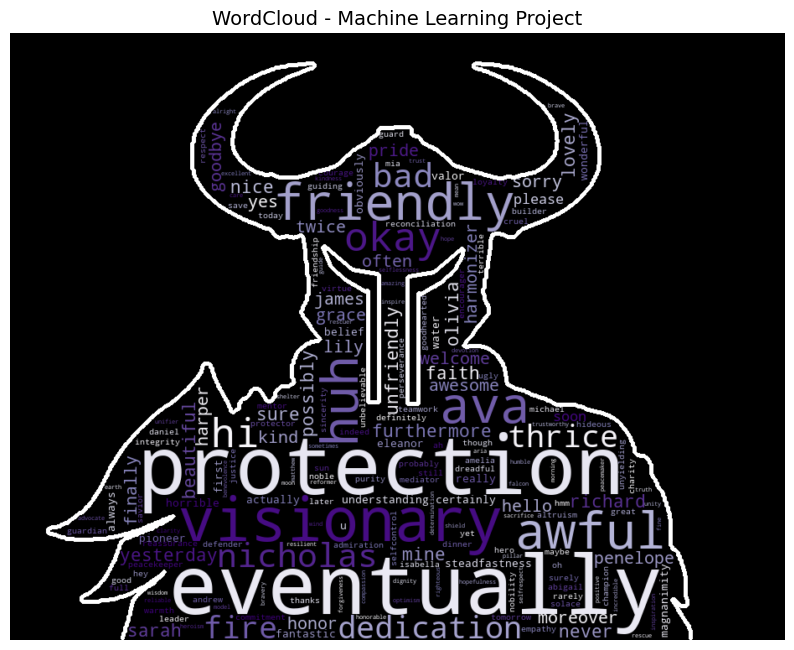

WordCloud saved as: img/Villain_3.png


In [56]:
image_path = "img/Villain 2.png"
output_path = "img/Villain_3.png"

mask_image = np.array(Image.open(image_path))

text = words_hero 

wordcloud = WordCloud(
    collocations=False,
    background_color="black",  
    mask=mask_image,          
    contour_width=5,          
    contour_color="white",    
    colormap="Purples",         
    max_words=200,            
    width=mask_image.shape[1],
    height=mask_image.shape[0]
).generate(text)

plt.figure(figsize=(10, 10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")  
plt.title("WordCloud - Machine Learning Project", fontsize=14)
plt.show()

wordcloud.to_file(output_path)
print(f"WordCloud saved as: {output_path}")